In this project, I want to see what was important and affected the standings for the Turkish Super League 2023/24 season. Secondly, I wanted to see statistically if Galatasaray deserved to be the champion or not.
Of course, in sports, lots of different situations affect the standings. But at least as an opinion, I wanted to check what really affected Galatasaray statistically to be the champion.
While doing that, I'm going to use two different datasets.
The first is: https://theanalyst.com/eu/2023/08/turkish-superlig-stats-2023-24/
and the second is: https://fbref.com/en/comps/26/Super-Lig-Stats
For the first dataset, it was kind of hard to get the data as a table because the website didn't allow copying data. So I tried to use BeautifulSoup and other methods, but I couldn't make it. After all, I took a screenshot of the tables, turned them into text, then edited them and converted them to a CSV file. Still, I'm going to use that website for reference.
But for the second website's data, it was easy because I just copied the tables and used them as a CSV.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

expected_goals_for = pd.read_csv("theanalyst/EXPECTED_GOALS_FOR.csv")
expected_goals_for
# non-penalty chances only

,POS,TEAM,XG RATIO,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS
0,1,GALATASARAY,0.20,525,52.99,64,203,16.16,15
1,2,FENERBAHÇE,0.14,504,66.51,70,147,13.27,13
2,3,TRABZONSPOR,0.20,361,35.13,47,149,9.55,14
3,4,ISTANBUL BASAKSEHIR,0.19,323,37.84,41,115,9.94,9
4,5,KASIMPASA,0.21,403,36.28,41,129,10.77,13
5,6,BESIKTAS,0.22,375,33.66,35,133,11.04,13
6,7,SIVASSPOR,0.21,299,28.19,32,130,8.78,9
7,8,ALANYASPOR,0.19,338,37.68,40,107,9.92,7
8,9,CAYKUR RIZESPOR,0.23,357,37.50,33,133,11.65,13
9,10,ANTALYASPOR,0.27,343,26.95,32,152,11.61,7


GLOSSARY

- Set Play
	
Chances occuring as a result of a corner, direct free kick, indirect free kick or throw-in.
- SP:Total	

The proportion of a team's total xG that resulted from set plays.
- Expected Goals (xG)	

Expected Goals (xG) measures the quality of a shot based on several variables such as assist type, shot angle and distance from goal, whether it was a headed shot and whether it was defined as a big chance. Adding up a player or team's expected goals can give us an indication of how many goals a player or team should have scored on average, given the shots they have taken.

In [49]:
expected_goals_against = pd.read_csv("theanalyst/EXPECTED_GOALS_AGAINST.csv")
expected_goals_against
# non-penalty chances only

,POS,TEAM,XG RATIO,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS
0,1,GALATASARAY,0.24,282,20.80,14,106,7.46,9
1,2,FENERBAHÇE,0.21,201,16.91,21,95,5.38,5
2,3,TRABZONSPOR,0.16,373,35.16,38,104,7.66,5
3,4,ISTANBUL BASAKSEHIR,0.25,361,29.58,28,149,11.56,9
4,5,KASIMPASA,0.18,373,43.68,41,116,11.29,17
5,6,BESIKTAS,0.19,328,29.61,34,116,7.95,8
6,7,SIVASSPOR,0.19,415,38.34,41,127,9.83,9
7,8,ALANYASPOR,0.20,360,33.64,35,148,8.96,11
8,9,CAYKUR RIZESPOR,0.22,411,35.85,41,161,12.23,9
9,10,ANTALYASPOR,0.20,336,37.81,34,113,10.76,11


GLOSSARY

- Set Play	

Chances occuring as a result of a corner, direct free kick, indirect free kick or throw-in.
- SP:Total	

The proportion of a team's total xG that resulted from set plays.
- Expected Goals (xG)	

Expected Goals (xG) measures the quality of a shot based on several variables such as assist type, shot angle and distance from goal, whether it was a headed shot and whether it was defined as a big chance. Adding up a player or team's expected goals can give us an indication of how many goals a player or team should have scored on average, given the shots they have taken.

In [50]:
passes_per_sequence = pd.read_csv("theanalyst/PASSES_PER_SEQUENCE.csv")
passes_per_sequence

,POS,TEAM,SEQUENCE TIME,PASSES PER SEQUENCE,DIRECT SPEED,10+ PASS OP SEQUENCES,BUILD UP ATTACKS,DIRECT ATTACKS
0,1,GALATASARAY,9.32,3.38,2.06,343,97,75
1,2,FENERBAHÇE,8.94,3.38,2.08,333,88,71
2,3,TRABZONSPOR,9.83,3.51,1.75,358,79,50
3,4,ISTANBUL BASAKSEHIR,10.49,3.55,1.72,382,65,47
4,5,KASIMPASA,7.30,2.74,2.05,170,27,76
5,6,BESIKTAS,9.37,3.31,1.99,326,57,73
6,7,SIVASSPOR,8.34,2.89,2.09,203,30,84
7,8,ALANYASPOR,10.16,3.74,1.74,410,75,68
8,9,CAYKUR RIZESPOR,8.20,2.86,2.06,197,32,63
9,10,ANTALYASPOR,8.69,3.25,2.04,303,72,47


GLOSSARY

- Sequences	

Sequences are defined as passages of play which belong to one team and are ended by defensive actions, stoppages in play or a shot.
- Possessions	

Possessions are defined as one or more sequences in a row belonging to the same team. A series of passes leading to a shot which is saved and results in a corner kick would comprise one possession since the same team retains control, but more than one sequence, since the ball has gone out of play. A possession is ended by the opposition gaining control of the ball.
- Sequence Time	

The average time (in seconds) per sequence.
- Passes per Sequence	

The average number of passes per sequence.
- Direct Speed	

A measure of how quickly a team progresses the ball upfield (metres/second).
- 10+ Pass OP Sequences	

The number of open play sequences that includes 10 or more passes.
- Build Up Attacks	

The number of open play sequences that contains 10 or more passes and either ends in a shot or has at least one touch in the box.
- Direct Attacks
	
The number of open play sequences that starts just inside the team's own half and has at least 50% of movement towards the opposition's goal and ends in a shot or a touch in the opposition box.

In [51]:
team_sequence_pressures = pd.read_csv("theanalyst/TEAM_SEQUENCE_PRESSURES.csv")
team_sequence_pressures

,POS,TEAM,PPDA,TOTAL,SHOT ENDING,GOAL ENDING
0,1,GALATASARAY,7.3,344,64,3
1,2,FENERBAHÇE,9.4,351,80,16
2,3,TRABZONSPOR,10.6,285,45,5
3,4,ISTANBUL BASAKSEHIR,12.4,246,27,1
4,5,KASIMPASA,12.2,300,57,8
5,6,BESIKTAS,10.2,273,41,4
6,7,SIVASSPOR,16.5,178,30,0
7,8,ALANYASPOR,13.2,269,39,4
8,9,CAYKUR RIZESPOR,12.5,201,36,4
9,10,ANTALYASPOR,11.7,241,48,2


GLOSSARY

- High Turnovers	

The number of sequences that start in open play and begin 40m or less from the opponent's goal.
- Shot Ending 

The number of shot-ending sequences that start in open play and begin 40m or less from the opponent's goal.
- Goal Ending 

The number of goal-ending sequences that start in open play and begin 40m or less from the opponent's goal.
- PPDA	

PPDA is the number of opposition passes allowed outside of the pressing team's own defensive third, divided by the number of defensive actions by the pressing team outside of their own defensive third. A lower figure indicates a higher level of pressing, while a higher figure indicates a lower level of pressing.

`FBREF` tables and glossaries
# Süper Lig Glossary
Rk -- Rank
Squad finish in competition
Finish within the league or competition.
For knockout competitions may show final round reached.
Colors and arrows represent promotion/relegation or qualifiation for continental cups.
Trophy indicates team won league whether by playoffs or by leading the table.
Star indicates topped table in league USING another means of naming champion.
MP -- Matches Played
Matches Played by the player or squad
W -- Wins
Wins
D -- Draws
Draws
L -- Losses
Losses
GF -- Goals For
Goals For
GA -- Goals Against
Goals Against
GD -- Goal Difference
Goal Difference
Pts -- Points
Most leagues are ordered by points.
Three for a win and one for a draw.
Pts/MP -- Points/Match
Points per Match Played
Attendance -- Attendance/Game
Attendance per game during this season, only for home matches
Top Team Scorer -- Only includes league matches for that season
Goalkeeper -- Goalkeeper with the most minutes in league play

In [52]:
süper_lig = pd.read_csv("fbref/super_lig_standings.csv")
süper_lig = süper_lig.iloc[:, :11]
süper_lig

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP
0,1,Galatasaray,38,33,3,2,92,26,66,102,2.68
1,2,Fenerbahçe,38,31,6,1,99,31,68,99,2.61
2,3,Trabzonspor,38,21,4,13,69,50,19,67,1.76
3,4,Başakşehir,38,18,7,13,57,43,14,61,1.61
4,5,Kasımpaşa,38,16,8,14,62,65,-3,56,1.47
5,6,Beşiktaş,38,16,8,14,52,47,5,56,1.47
6,7,Sivasspor,38,14,12,12,47,54,-7,54,1.42
7,8,Alanyaspor,38,12,16,10,53,50,3,52,1.37
8,9,Rizespor,38,14,8,16,48,58,-10,50,1.32
9,10,Antalyaspor,38,12,13,13,44,49,-5,49,1.29


# Squad Standard Stats Glossary
Pl -- # of Players
Number of Players used in Games
Age -- Average Age
Age is weighted by minutes played
Poss -- Possession
Possession
Calculated as the percentage of passes attempted
Playing Time
MP -- Matches Played
Matches Played by the player or squad
Starts -- Game or games started by player
Min -- Minutes
90s -- 90s Played
90s played
Minutes played divided by 90
Performance
Gls -- Goals
Goals scored or allowed
Ast -- Assists
Assists
G+A -- Goals + Assists
Goals and Assists
G-PK -- Non-Penalty Goals
Non-Penalty Goals
PK -- Penalty Kicks Made
Penalty Kicks Made
PKatt -- Penalty Kicks Attempted
Penalty Kicks Attempted
CrdY -- Yellow Cards
Yellow Cards
CrdR -- Red Cards
Red Cards
Per 90 Minutes
Gls -- Goals/90
Goals Scored per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader
Ast -- Assists/90
Assists per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader
G+A -- Goals + Assists/90
Goals and Assists per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader
G-PK -- Non-Penalty Goals/90
Goals minus Penalty Kicks made per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader
G+A-PK -- Non-Penalty Goals + Assists/90
Goals plus Assists minus Penalty Kicks made per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader

In [53]:
squad_standard_stats = pd.read_csv("fbref/Squad_Standard_Stats.csv")
squad_standard_stats

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK
0,Adana Demirspor,44,28.2,51.9,38,418,3420,38.0,53,30,83,45,8,8,81,8,1.39,0.79,2.18,1.18,1.97
1,Alanyaspor,25,28.0,52.7,38,418,3420,38.0,52,30,82,47,5,7,87,4,1.37,0.79,2.16,1.24,2.03
2,Ankaragücü,31,27.5,48.3,38,418,3420,38.0,45,30,75,41,4,5,67,3,1.18,0.79,1.97,1.08,1.87
3,Antalyaspor,27,29.1,51.2,38,418,3420,38.0,43,33,76,39,4,5,78,4,1.13,0.87,2.00,1.03,1.89
4,Başakşehir,35,28.4,53.0,38,418,3420,38.0,55,36,91,50,5,6,84,5,1.45,0.95,2.39,1.32,2.26
5,Beşiktaş,37,27.8,55.0,38,418,3420,38.0,51,37,88,48,3,6,92,4,1.34,0.97,2.32,1.26,2.24
6,Fatih Karagümrük,35,28.8,50.0,38,418,3420,38.0,47,37,84,45,2,3,96,7,1.24,0.97,2.21,1.18,2.16
7,Fenerbahçe,33,28.3,57.1,38,418,3420,38.0,95,64,159,83,12,17,96,5,2.50,1.68,4.18,2.18,3.87
8,Galatasaray,32,28.4,61.0,38,418,3420,38.0,90,59,149,79,11,13,66,1,2.37,1.55,3.92,2.08,3.63
9,Gaziantep FK,30,29.6,42.1,38,418,3420,38.0,48,33,81,45,3,6,85,4,1.26,0.87,2.13,1.18,2.05


# Squad Goalkeeping Glossary
Pl -- # of Players
Number of Players used in Games
Playing Time
MP -- Matches Played
Matches Played by the player or squad
Starts -- Game or games started by player
Min -- Minutes
90s -- 90s Played
90s played
Minutes played divided by 90
Performance
GA -- Goals Against
Goals Against
GA90 -- Goals Against/90
Goals Against per 90 minutes
SoTA -- Shots on Target Against
Shots on Target Against
Save% -- Save Percentage
Save Percentage
(Shots on Target Against - Goals Against)/Shots on Target Against
Note that not all shots on target are stopped by the keeper, many will be stopped by defenders
Does not include penalty kicks
W -- Wins
Wins
D -- Draws
Draws
L -- Losses
Losses
CS -- Clean Sheets
Clean Sheets
Full matches by goalkeeper where no goals are allowed.
CS% -- Clean Sheet Percentage
Clean Sheet Percentage
Percentage of matches that result in clean sheets.
Penalty Kicks
PKatt -- Penalty Kicks Attempted
Penalty Kicks Attempted
PKA -- Penalty Kicks Allowed
Penalty Kicks Allowed
PKsv -- Penalty Kicks Saved
Penalty Kicks Saved
PKm -- Penalty Kicks Missed
Penalty Kicks Missed
Save% -- Save% (Penalty Kicks)
Penalty Save Percentage
Penalty Kick Goals Against/Penalty Kick Attempts
Penalty shots that miss the target are not included

In [54]:
squad_goalkeeping = pd.read_csv("fbref/Squad_Goalkeeping.csv")
squad_goalkeeping

,Squad,# Pl,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1
0,Adana Demirspor,4,38,38,3415,38,61,1.61,185,131,71.4,10,14,14,10,26.3,10,8,0,2,0.0
1,Alanyaspor,2,38,38,3420,38,50,1.32,155,107,69.7,12,16,10,9,23.7,3,3,0,0,0.0
2,Ankaragücü,3,38,38,3415,38,52,1.37,158,110,69.6,8,16,14,7,18.4,4,4,0,0,0.0
3,Antalyaspor,2,38,38,3420,38,49,1.29,166,121,72.9,12,13,13,8,21.1,5,4,0,1,0.0
4,Başakşehir,3,38,38,3420,38,43,1.13,138,99,71.7,18,7,13,13,34.2,6,4,2,0,33.3
5,Beşiktaş,2,38,38,3418,38,47,1.24,142,100,69.7,16,8,14,14,36.8,5,4,1,0,20.0
6,Fatih Karagümrük,3,38,38,3420,38,52,1.37,152,107,70.4,10,10,18,8,21.1,9,7,1,1,12.5
7,Fenerbahçe,4,38,38,3420,38,31,0.82,97,70,73.2,31,6,1,17,44.7,5,5,0,0,0.0
8,Galatasaray,2,38,38,3420,38,26,0.68,115,92,79.1,33,3,2,18,47.4,3,2,1,0,33.3
9,Gaziantep FK,2,38,38,3420,38,57,1.50,168,118,69.6,12,8,18,9,23.7,10,6,2,2,25.0


# Squad Shoting Glossary
Pl -- # of Players
Number of Players used in Games
90s -- 90s Played
90s played
Minutes played divided by 90
Standard
Gls -- Goals
Goals scored or allowed
Sh -- Shots Total
Shots Total
Does not include penalty kicks
SoT -- Shots on Target
Shots on Target
Note: Shots on target do not include penalty kicks
SoT% -- Shots on Target %
Percentage of shots that are on target
Minimum .395 shots per squad game to qualify as a leader
Note: Shots on target do not include penalty kicks
Sh/90 -- Shots Total/90
Shots total per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader
SoT/90 -- Shots on target/90
Shots on target per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader
Note: Shots on target do not include penalty kicks
G/Sh -- Goals/Shot
Goals per shot
Minimum .395 shots per squad game to qualify as a leader
G/SoT -- Goals/Shot on Target
Goals per shot on target
Minimum .111 shots on target per squad game to qualify as a leader
Note: Shots on target do not include penalty kicks
Dist -- Average Shot Distance
Average distance, in yards, from goal of all shots taken
Minimum .395 shots per squad game to qualify as a leader
Does not include penalty kicks
PK -- Penalty Kicks Made
Penalty Kicks Made
PKatt -- Penalty Kicks Attempted
Penalty Kicks Attempted

In [55]:
squad_shoting = pd.read_csv("fbref/Squad_Shooting.csv")
squad_shoting

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,PK,PKatt
0,Adana Demirspor,44,38.0,53,525,187,35.6,13.82,4.92,0.09,0.24,NaN,8,8.0
1,Alanyaspor,25,38.0,52,449,152,33.9,11.82,4.00,0.10,0.31,NaN,5,7.0
2,Ankaragücü,31,38.0,45,456,155,34.0,12.00,4.08,0.09,0.26,NaN,4,5.0
3,Antalyaspor,27,38.0,43,502,150,29.9,13.21,3.95,0.08,0.26,NaN,4,5.0
4,Başakşehir,35,38.0,55,443,161,36.3,11.66,4.24,0.11,0.31,NaN,5,6.0
5,Beşiktaş,37,38.0,51,514,177,34.4,13.53,4.66,0.09,0.27,NaN,3,6.0
6,Fatih Karagümrük,35,38.0,47,463,154,33.3,12.18,4.05,0.10,0.29,NaN,2,3.0
7,Fenerbahçe,33,38.0,95,668,266,39.8,17.58,7.00,0.12,0.31,NaN,12,17.0
8,Galatasaray,32,38.0,90,747,256,34.3,19.66,6.74,0.11,0.31,NaN,11,13.0
9,Gaziantep FK,30,38.0,48,430,148,34.4,11.32,3.89,0.10,0.30,NaN,3,6.0


# Squad Playing Time Glossary
Pl -- # of Players
Number of Players used in Games
Age -- Average Age
Age is weighted by minutes played
Playing Time
MP -- Matches Played
Matches Played by the player or squad
Min -- Minutes
Mn/MP -- Minutes Per Match Played
Minutes Per Match Played
Min% -- Percentage of Squad Minutes Played
Percentage of Minutes Played
Percentage of team's total minutes in which player was on the pitch
Player minutes played divided by team total minutes played
Minimum 30 minutes played per squad game to qualify as a leader
90s -- 90s Played
90s played
Minutes played divided by 90
Starts
Starts -- Game or games started by player
Mn/Start -- Minutes Per Match Started
Minutes Per Match Started
Minimum 30 minutes played per squad game to qualify as a leader
Compl -- Complete Matches Played
Complete matches played
Subs
Subs -- Substitute Appearances
Games as sub
Game or games player did not start, so as a substitute
Mn/Sub -- Minutes Per Substitution
Minutes Per Substitution
Minimum 30 minutes played per squad game to qualify as a leader
unSub -- Matches as Unused Sub
Games as an unused substitute
Team Success
PPM -- Points per Match
Points per Match
Average number of points earned by the team from matches in which the player appeared
Minimum 30 minutes played per squad game to qualify as a leader
onG -- Goals Scored (on pitch)
Goals scored by team while on pitch
onGA -- Goals Allowed (on pitch)
Goals allowed by team while on pitch
+/- -- Plus/Minus
Plus/Minus
Goals scored minus goals allowed by the team while the player was on the pitch.
+/-90 -- Plus/Minus/90
Plus/Minus per 90 Minutes
Goals scored minus goals allowed by the team while the player was on the pitch per 90 minutes played.
Minimum 30 minutes played per squad game to qualify as a leader

In [56]:
squad_playing_time = pd.read_csv("fbref/Squad_Playing_Time.csv")
squad_playing_time

,Squad,# Pl,Age,MP,Min,Mn/MP,Min%,90s,Starts,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90
0,Adana Demirspor,44,28.2,38,3420,90,100,38.0,418,81,249,162,22,215,1.16,54,61,-7,-0.18
1,Alanyaspor,25,28.0,38,3420,90,100,38.0,418,83,264,152,17,228,1.37,53,50,3,0.08
2,Ankaragücü,31,27.5,38,3420,90,100,38.0,418,81,240,175,20,205,1.05,46,52,-6,-0.16
3,Antalyaspor,27,29.1,38,3420,90,100,38.0,418,83,260,154,19,217,1.29,44,49,-5,-0.13
4,Başakşehir,35,28.4,38,3420,90,100,38.0,418,82,235,179,18,193,1.61,57,43,14,0.37
5,Beşiktaş,37,27.8,38,3420,90,100,38.0,418,81,251,166,21,214,1.47,52,47,5,0.13
6,Fatih Karagümrük,35,28.8,38,3420,90,100,38.0,418,81,239,175,20,202,1.05,49,52,-3,-0.08
7,Fenerbahçe,33,28.3,38,3420,90,100,38.0,418,82,249,165,19,212,2.61,99,31,68,1.79
8,Galatasaray,32,28.4,38,3420,90,100,38.0,418,83,230,187,17,191,2.68,92,26,66,1.74
9,Gaziantep FK,30,29.6,38,3420,90,100,38.0,418,84,270,145,16,231,1.16,50,57,-7,-0.18


# Squad Miscellaneous Stats Glossary
Pl -- # of Players
Number of Players used in Games
90s -- 90s Played
90s played
Minutes played divided by 90
Performance
CrdY -- Yellow Cards
Yellow Cards
CrdR -- Red Cards
Red Cards
2CrdY -- Second Yellow Card
Second Yellow Card
Fls -- Fouls Committed
Fouls Committed
Fld -- Fouls Drawn
Fouls Drawn
Off -- Offsides
Offsides
Crs -- Crosses
Crosses
Int -- Interceptions
Interceptions
TklW -- Tackles Won
Tackles in which the tackler's team won possession of the ball
PKwon -- Penalty Kicks Won
Penalty Kicks Won
PKcon -- Penalty Kicks Conceded
Penalty Kicks Conceded
OG -- Own Goals
Own Goals

In [57]:
squad_miscellaneous_stats = pd.read_csv("fbref/Squad_Miscellaneous_Stats.csv")
squad_miscellaneous_stats

,Squad,# Pl,90s,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG
0,Adana Demirspor,44,38.0,81,8,4,422,509,70,607,318,393,NaN,2,NaN
1,Alanyaspor,25,38.0,87,4,2,427,461,80,670,295,355,NaN,1,NaN
2,Ankaragücü,31,38.0,67,3,1,426,389,62,572,358,353,NaN,1,NaN
3,Antalyaspor,27,38.0,78,4,1,471,485,34,747,375,358,NaN,0,NaN
4,Başakşehir,35,38.0,84,5,4,499,479,91,574,326,325,NaN,2,NaN
5,Beşiktaş,37,38.0,92,4,1,519,458,54,748,359,370,NaN,1,NaN
6,Fatih Karagümrük,35,38.0,96,7,2,483,457,63,705,334,323,NaN,3,NaN
7,Fenerbahçe,33,38.0,96,5,4,516,525,78,775,346,409,NaN,0,NaN
8,Galatasaray,32,38.0,66,1,1,523,428,78,844,336,411,NaN,1,NaN
9,Gaziantep FK,30,38.0,85,4,3,441,440,54,597,442,412,NaN,2,NaN


In [58]:
# BLUE-GREY-RED CALCULATE AND FIND CORR
import pandas as pd

zones = {
    "Squad": ["GALATASARAY", "FENERBAHÇE", "KAYSERISPOR", "ALANYASPOR", "BEŞIKTAŞ", "ANTALYASPOR", "TRABZONSPOR", "PENDIKSPOR", "FATIH KARAGÜMRÜK", "BAŞAKŞEHIR", "RIZESPOR", "İSTANBULSPOR", "HATAYSPOR", "ANKARAGÜCÜ", "ADANA DEMIRSPOR", "SAMSUNSPOR", "KONYASPOR", "GAZIANTEP FK", "KASIMPAŞA", "SIVASSPOR"],
    "Blues": [19, 17, 13, 12, 12, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 8, 7, 7, 5, 5],
    "Greys": [9, 12, 9, 12, 10, 13, 12, 11, 10, 15, 11, 11, 10, 10, 14, 9, 9, 7, 13, 6],
    "Reds": [2, 1, 8, 6, 8, 7, 8, 9, 10, 6, 11, 11, 12, 12, 8, 13, 14, 16, 12, 19]
}

# Converted the dictionary to a DataFrame
zones_df = pd.DataFrame(zones)
zones_df.reset_index(drop=True, inplace=True)
zones_df["Rk"] = zones_df.index + 1
print(zones_df)

# Assuming süper_lig is already defined as a DataFrame
zones_df["Squad"] = zones_df["Squad"].str.upper().str.strip()
süper_lig["Squad"] = süper_lig["Squad"].str.upper().str.strip()
süper_lig_with_zones = pd.merge(zones_df, süper_lig, on="Squad", suffixes=("_Z", "_S"))
süper_lig_with_zones = süper_lig_with_zones.sort_values("Pts", ascending=False)

# I selected necessary columns
selected_süper_lig_with_zones = süper_lig_with_zones[["Squad", "Blues", "Greys", "Reds", "W", "D", "L", "Pts"]]
selected_süper_lig_with_zones

correlation_matrix = selected_süper_lig_with_zones.select_dtypes(include=["number"]).corr()
correlation_matrix

               Squad  Blues  Greys  Reds  Rk
0        GALATASARAY     19      9     2   1
1         FENERBAHÇE     17     12     1   2
2        KAYSERISPOR     13      9     8   3
3         ALANYASPOR     12     12     6   4
4           BEŞIKTAŞ     12     10     8   5
5        ANTALYASPOR     10     13     7   6
6        TRABZONSPOR     10     12     8   7
7         PENDIKSPOR     10     11     9   8
8   FATIH KARAGÜMRÜK     10     10    10   9
9         BAŞAKŞEHIR      9     15     6  10
10          RIZESPOR      8     11    11  11
11      İSTANBULSPOR      8     11    11  12
12         HATAYSPOR      8     10    12  13
13        ANKARAGÜCÜ      8     10    12  14
14   ADANA DEMIRSPOR      8     14     8  15
15        SAMSUNSPOR      8      9    13  16
16         KONYASPOR      7      9    14  17
17      GAZIANTEP FK      7      7    16  18
18         KASIMPAŞA      5     13    12  19
19         SIVASSPOR      5      6    19  20


,Blues,Greys,Reds,W,D,L,Pts
Blues,1.000000,0.079295,-0.858188,0.706249,-0.385009,-0.662980,0.714887
Greys,0.079295,1.000000,-0.579769,0.101019,-0.062357,-0.089831,0.100834
Reds,-0.858188,-0.579769,1.000000,-0.629276,0.346800,0.588149,-0.636242
W,0.706249,0.101019,-0.629276,1.000000,-0.662834,-0.858000,0.989302
D,-0.385009,-0.062357,0.346800,-0.662834,1.000000,0.184109,-0.546514
L,-0.662980,-0.089831,0.588149,-0.858000,0.184109,1.000000,-0.923752
Pts,0.714887,0.100834,-0.636242,0.989302,-0.546514,-0.923752,1.000000


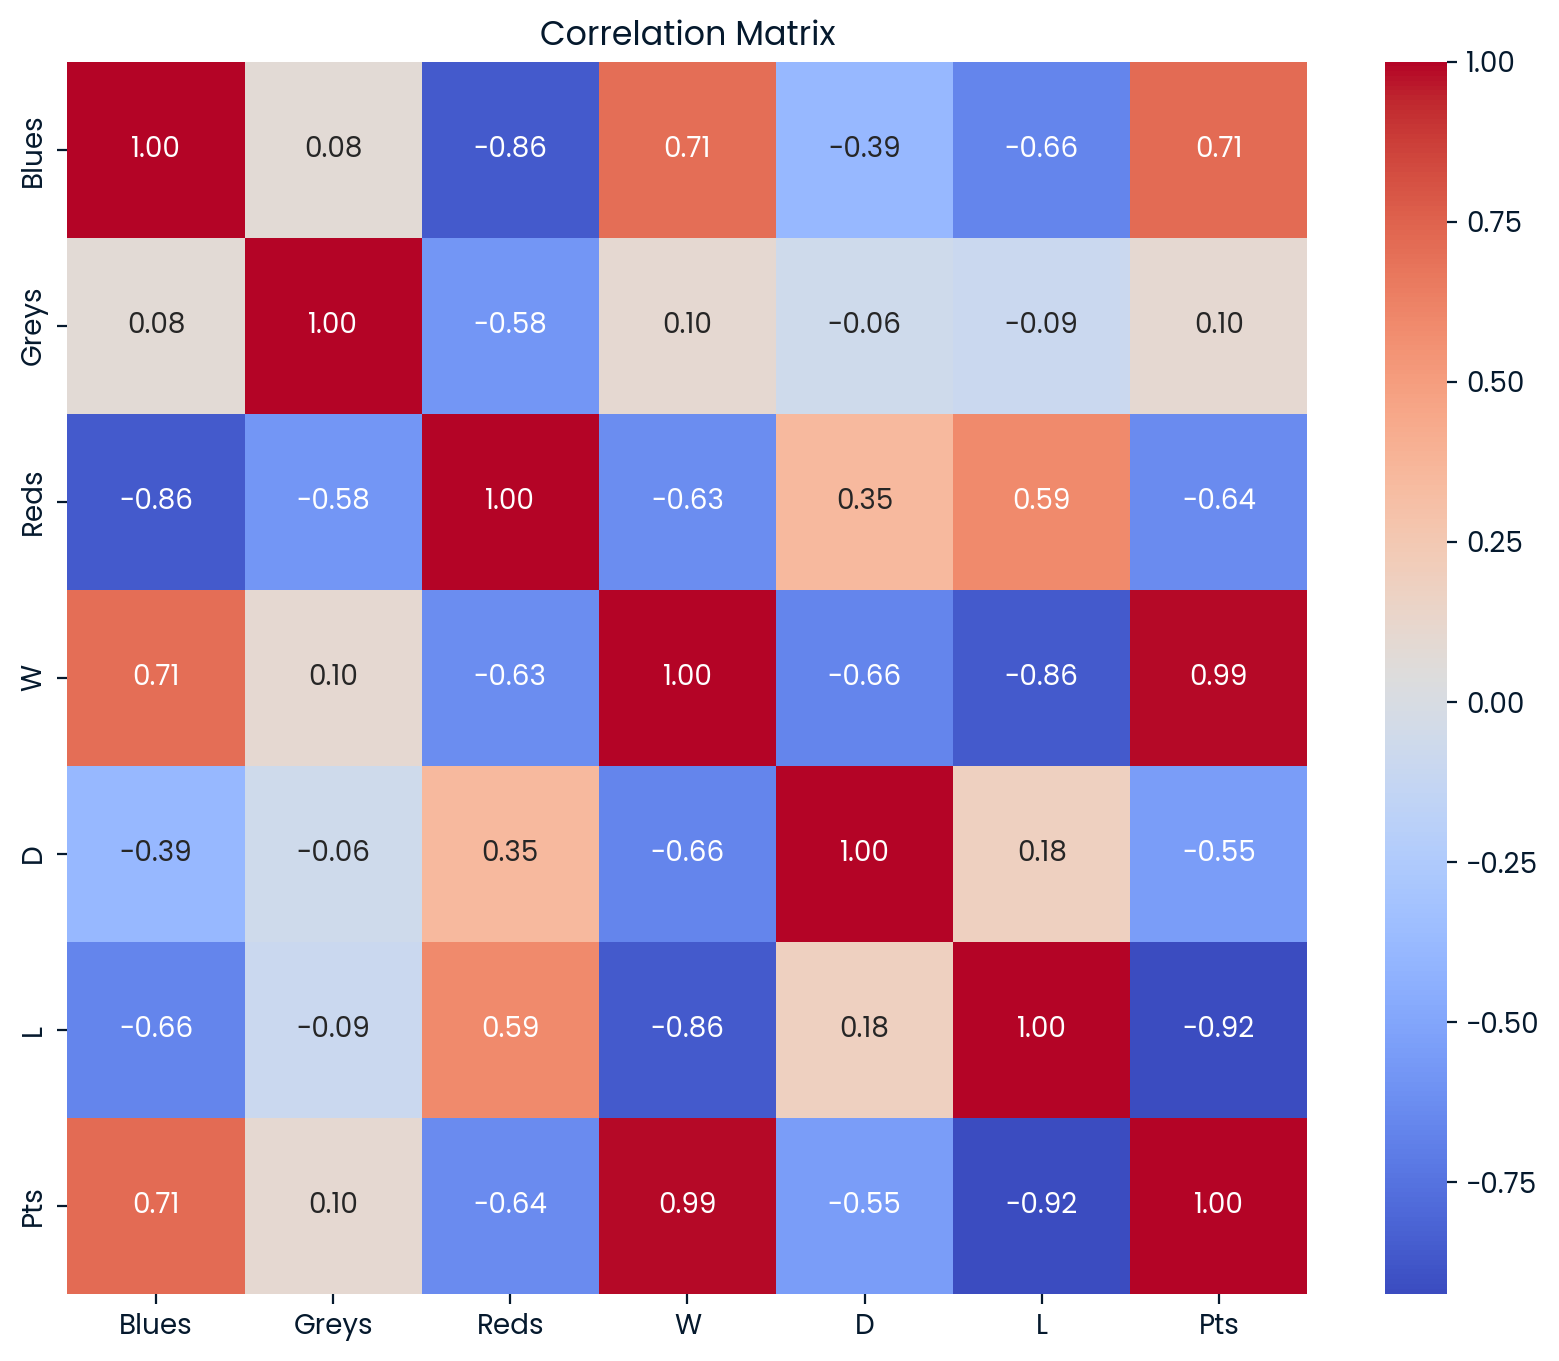

In [59]:
# Let's make that corr table more clear with visualizing
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

               Squad  Blues  Greys  Reds  Rk
0        GALATASARAY     19      9     2   1
1         FENERBAHÇE     17     12     1   2
2        KAYSERISPOR     13      9     8   3
3         ALANYASPOR     12     12     6   4
4           BEŞIKTAŞ     12     10     8   5
5        ANTALYASPOR     10     13     7   6
6        TRABZONSPOR     10     12     8   7
7         PENDIKSPOR     10     11     9   8
8   FATIH KARAGÜMRÜK     10     10    10   9
9         BAŞAKŞEHIR      9     15     6  10
10          RIZESPOR      8     11    11  11
11      İSTANBULSPOR      8     11    11  12
12         HATAYSPOR      8     10    12  13
13        ANKARAGÜCÜ      8     10    12  14
14   ADANA DEMIRSPOR      8     14     8  15
15        SAMSUNSPOR      8      9    13  16
16         KONYASPOR      7      9    14  17
17      GAZIANTEP FK      7      7    16  18
18         KASIMPAŞA      5     13    12  19
19         SIVASSPOR      5      6    19  20
0      True
1      True
2     False
3      True
4      

Text(0, 0.5, 'Team Count')

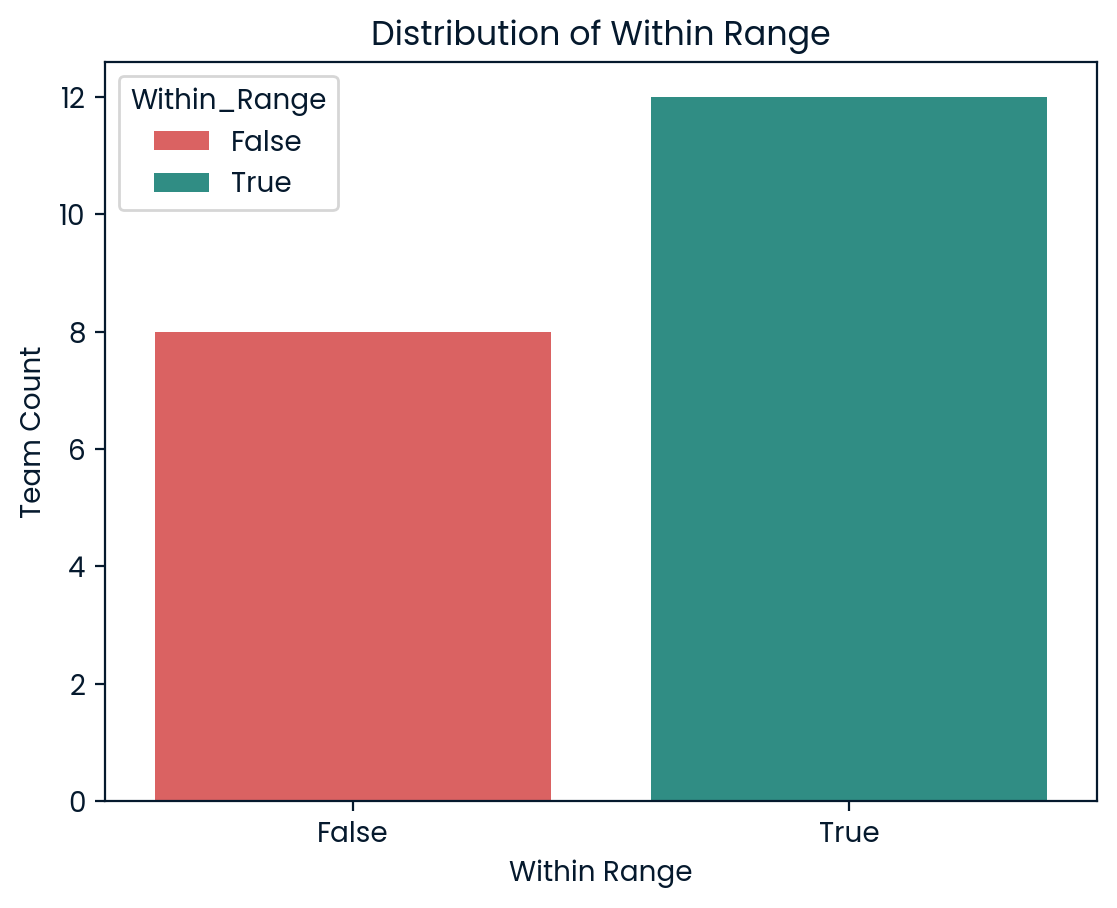

In [60]:
# I wanted to see how this correlation result affected the standings. Is it highly affected or not? 
# Let's find out the difference between zones ranking and real season end ranking. 
# While calculating this, I want to give those teams a ±4 overpay for their standings. 
# So if a team has an equal or less difference with zones and standings ranking, the output is going to be True, otherwise, it's going to return as False. Then we're going to see that on a countplot to understand that more clearly.

print(zones_df)
standing_zones_merged = pd.merge(zones_df[["Rk", "Squad"]], süper_lig[["Rk", "Squad"]], on="Squad", suffixes=("_Zone_Rank", "_Season_Standings"))
standing_zones_merged["Rank_Diff"] = (standing_zones_merged["Rk_Zone_Rank"] - standing_zones_merged["Rk_Season_Standings"]).abs()
standing_zones_merged["Within_Range3"] = standing_zones_merged["Rank_Diff"] <= 3
standing_zones_merged["Within_Range"] = standing_zones_merged["Rank_Diff"] <= 4
standing_zones_merged["Within_Range5"] = standing_zones_merged["Rank_Diff"] <= 5
print(standing_zones_merged["Within_Range"])
print(standing_zones_merged["Within_Range3"].value_counts(normalize=True))
print(standing_zones_merged["Within_Range"].value_counts(normalize=True))
print(standing_zones_merged["Within_Range5"].value_counts(normalize=True))

palette = {True: "#219C90", False: "#EE4E4E"}
sns.countplot(x="Within_Range", data=standing_zones_merged, hue="Within_Range", palette=palette)

# Add title and labels
plt.title("Distribution of Within Range")
plt.xlabel("Within Range")
plt.ylabel("Team Count")

In [61]:
standing_zones_merged = standing_zones_merged[["Squad", "Rk_Season_Standings", "Rank_Diff", "Within_Range"]]
standing_zones_merged

,Squad,Rk_Season_Standings,Rank_Diff,Within_Range
0,GALATASARAY,1,0,True
1,FENERBAHÇE,2,0,True
2,KAYSERISPOR,14,11,False
3,ALANYASPOR,8,4,True
4,BEŞIKTAŞ,6,1,True
5,ANTALYASPOR,10,4,True
6,TRABZONSPOR,3,4,True
7,PENDIKSPOR,19,11,False
8,FATIH KARAGÜMRÜK,18,9,False
9,BAŞAKŞEHIR,4,6,False


In [62]:
# Galatasaray and Fenerbahçe comparison

süper_lig["Squad"] = süper_lig["Squad"].str.upper().str.strip()
squad_standard_stats["Squad"] = squad_standard_stats["Squad"].str.upper().str.strip()
squad_goalkeeping["Squad"] = squad_goalkeeping["Squad"].str.upper().str.strip()
squad_miscellaneous_stats["Squad"] = squad_miscellaneous_stats["Squad"].str.upper().str.strip()

def_stats = pd.merge(süper_lig[["Pts", "Squad", "W", "D", "L", "GF", "GA"]], squad_standard_stats[["Squad", "Poss", "CrdY", "CrdR"]], on="Squad")  \
    .merge(squad_goalkeeping[["Squad", "# Pl", "GA90", "SoTA", "Saves", "Save%", "CS%", "PKsv", "PKm"]], on="Squad") \
    .merge(squad_miscellaneous_stats[["Squad", "Fls", "Fld", "Off", "Crs", "Int", "TklW"]], on="Squad")

def_stats_gs_fb = def_stats[def_stats["Squad"].isin(["FENERBAHÇE", "GALATASARAY"])]
def_stats_gs_fb

# FBGS stats GLOSSARY
# - W: Win
# - D: Draw
# - L: Lose
# - GF: Goal For
# - GA: Goal Against
# - Poss: Possession (Calculated as the percentage of passes attempted)
# - CrdY: Yellow Cards
# - CrdR: Red Cards
# - PL: Number of Goalkeepers used in Games
# - GA90: Goals Against/90
# - SoTA: Shots on Target Against
# - Saves: Goalkeepers Saves
# - Save%: Save Percentage 
# 
# (Shots on Target Against - Goals Against)/Shots on Target Against
# Note that not all shots on target are stopped by the keeper, many will be stopped by defenders
# Does not include penalty kicks
# 
# - CS%: Clean Sheet Percentage
# - PKsv: Penalty Kicks Saved
# - PKm: Penalty Kicks Missed
# - Fls: Fouls Committed
# - Fld: Fouls Drawn
# - Off: Offsides
# - Crs: Crosses
# - Int: Interceptions
# - TklW: Tackles Won

,Pts,Squad,W,D,L,GF,GA,Poss,CrdY,CrdR,# Pl,GA90,SoTA,Saves,Save%,CS%,PKsv,PKm,Fls,Fld,Off,Crs,Int,TklW
0,102,GALATASARAY,33,3,2,92,26,61.0,66,1,2,0.68,115,92,79.1,47.4,1,0,523,428,78,844,336,411
1,99,FENERBAHÇE,31,6,1,99,31,57.1,96,5,4,0.82,97,70,73.2,44.7,0,0,516,525,78,775,346,409


In [63]:
# Something wrong about this table value types
expected_goals_against.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   POS       20 non-null     int64  
 1   TEAM      20 non-null     object 
 2   XG RATIO  20 non-null     float64
 3   SHOTS     20 non-null     int64  
 4   XG        20 non-null     float64
 5   GOALS     20 non-null     int64  
 6   SP SHOTS  20 non-null     int64  
 7   SP XG     20 non-null     float64
 8   SP GOALS  20 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.5+ KB


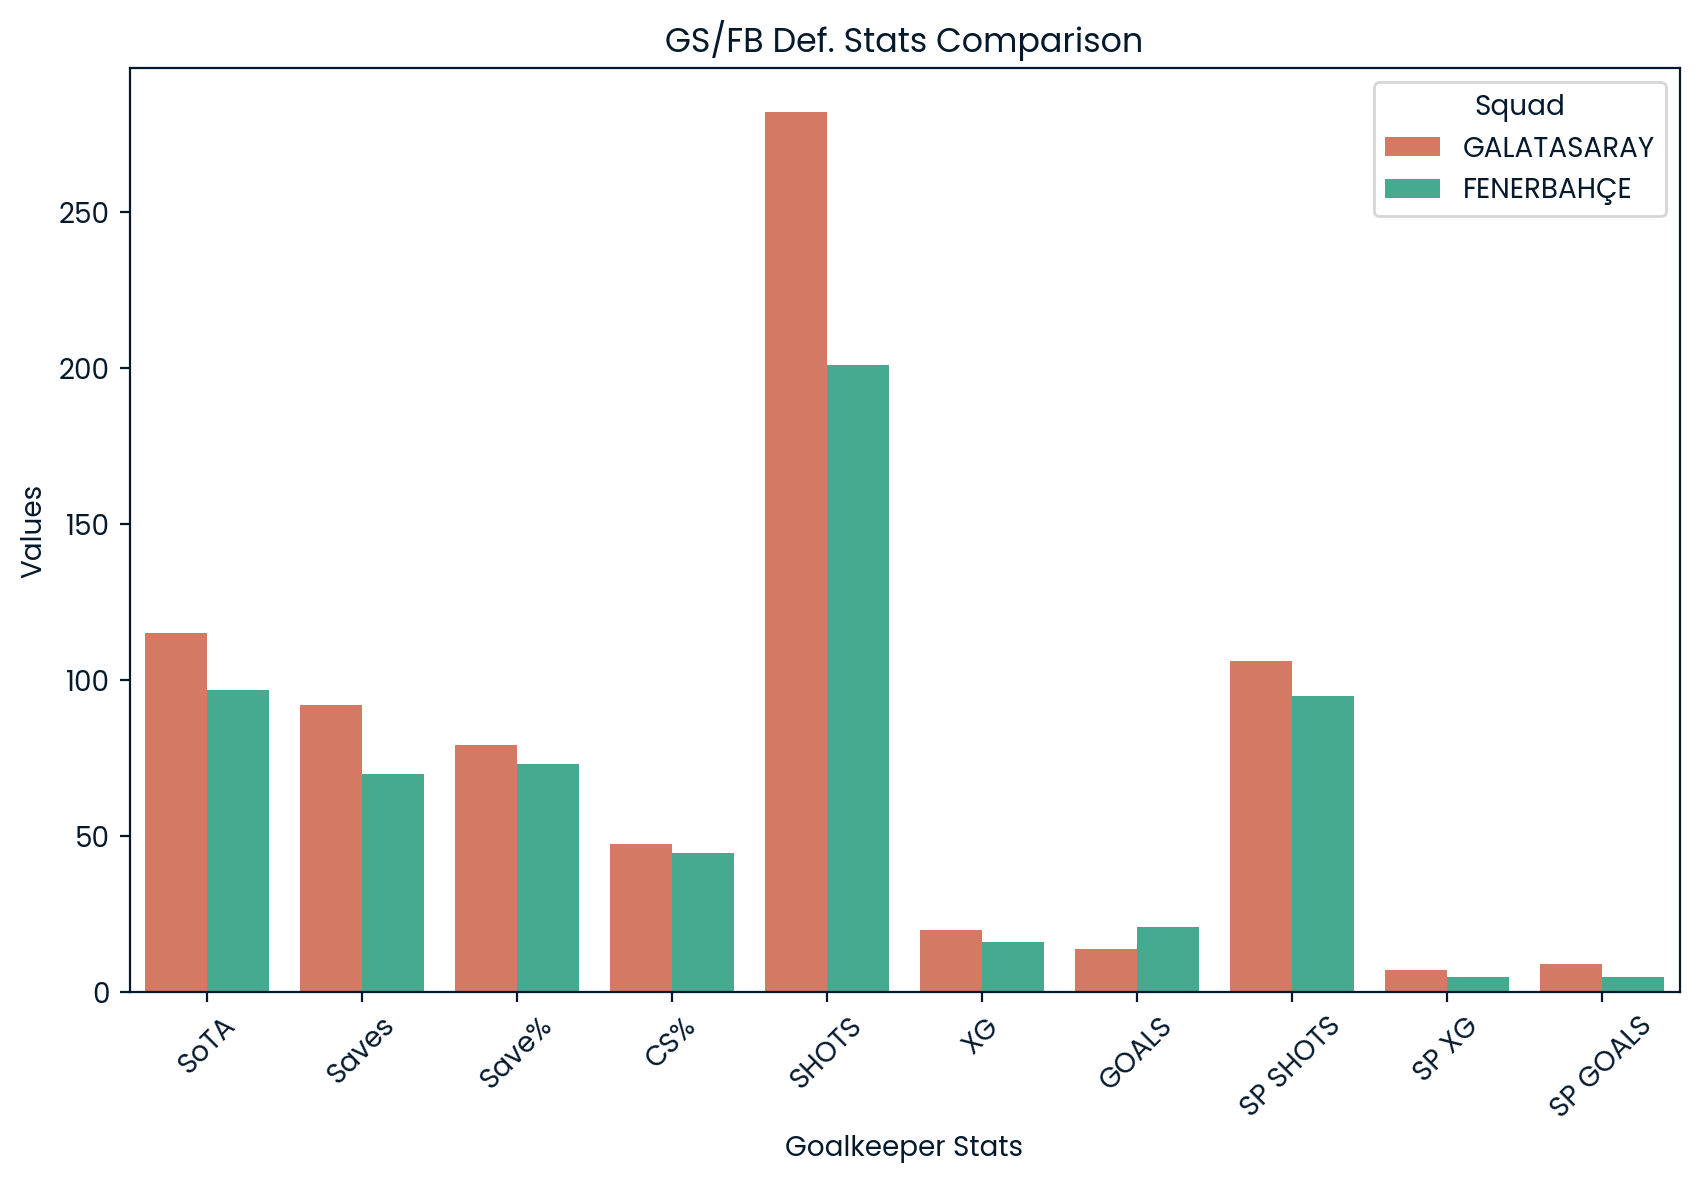

In [64]:
# Corrected the dtype conversion
expected_goals_against["XG"] = expected_goals_against["XG"].astype(int)
expected_goals_against["SP XG"] = expected_goals_against["SP XG"].astype(int)

def_stats_gs_fb_visual = def_stats_gs_fb[["Squad", "GA90", "SoTA", "Saves", "Save%", "CS%"]]
def_stats_gs_fb_visual = def_stats_gs_fb.merge(expected_goals_against, left_on="Squad", right_on="TEAM")
def_stats_gs_fb_visual = def_stats_gs_fb_visual[["Squad", "SoTA", "Saves", "Save%", "CS%", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS"]]

def_stats_melted = def_stats_gs_fb_visual.melt(id_vars=["Squad"], var_name="Statistic", value_name="Value")

def_stats_melted_filtered = def_stats_melted[def_stats_melted["Squad"].isin(["GALATASARAY", "FENERBAHÇE"])]

plt.figure(figsize=(10, 6))
sns.barplot(data=def_stats_melted_filtered, x="Statistic", y="Value", hue="Squad", palette=["#E76F51", "#36BA98"], dodge=True)

plt.xlabel("Goalkeeper Stats")
plt.ylabel("Values")
plt.title("GS/FB Def. Stats Comparison")
plt.xticks(rotation=45)
plt.legend(title="Squad")
plt.show()

In [94]:
def_stats_gs_fb_visual

,Squad,SoTA,Saves,Save%,CS%,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS
0,GALATASARAY,115,92,79.1,47.4,282,20,14,106,7,9
1,FENERBAHÇE,97,70,73.2,44.7,201,16,21,95,5,5


In [66]:
# Need some team name change
expected_goals_against.loc[expected_goals_against["TEAM"] == "ISTANBUL BASAKSEHIR", "TEAM"] = "BAŞAKŞEHIR"
expected_goals_against.loc[expected_goals_against["TEAM"] == "KASIMPASA", "TEAM"] = "KASIMPAŞA"
expected_goals_against.loc[expected_goals_against["TEAM"] == "BESIKTAS", "TEAM"] = "BEŞIKTAŞ"
expected_goals_against.loc[expected_goals_against["TEAM"] == "ISTANBULSPOR", "TEAM"] = "İSTANBULSPOR"
expected_goals_against.loc[expected_goals_against["TEAM"] == "CAYKUR RIZESPOR", "TEAM"] = "RIZESPOR"

In [67]:
# I'm gonna check top 7 teams def_stats
def_stats_top_seven = def_stats.iloc[:7]
def_stats_top_seven_visual = def_stats_top_seven[["Pts", "Squad", "GA90", "SoTA", "Saves", "Save%", "CS%"]]
def_stats_top_seven_visual = def_stats_top_seven_visual.merge(expected_goals_against, left_on="Squad", right_on="TEAM")
def_stats_top_seven_visual = def_stats_top_seven_visual[["Pts", "Squad", "SoTA", "Saves", "Save%", "CS%", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS"]]
def_stats_top_seven_visual

,Pts,Squad,SoTA,Saves,Save%,CS%,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS
0,102,GALATASARAY,115,92,79.1,47.4,282,20,14,106,7,9
1,99,FENERBAHÇE,97,70,73.2,44.7,201,16,21,95,5,5
2,67,TRABZONSPOR,151,106,70.2,26.3,373,35,38,104,7,5
3,61,BAŞAKŞEHIR,138,99,71.7,34.2,361,29,28,149,11,9
4,56,KASIMPAŞA,166,108,63.9,21.1,373,43,41,116,11,17
5,56,BEŞIKTAŞ,142,100,69.7,36.8,328,29,34,116,7,8
6,54,SIVASSPOR,186,134,72.6,26.3,415,38,41,127,9,9


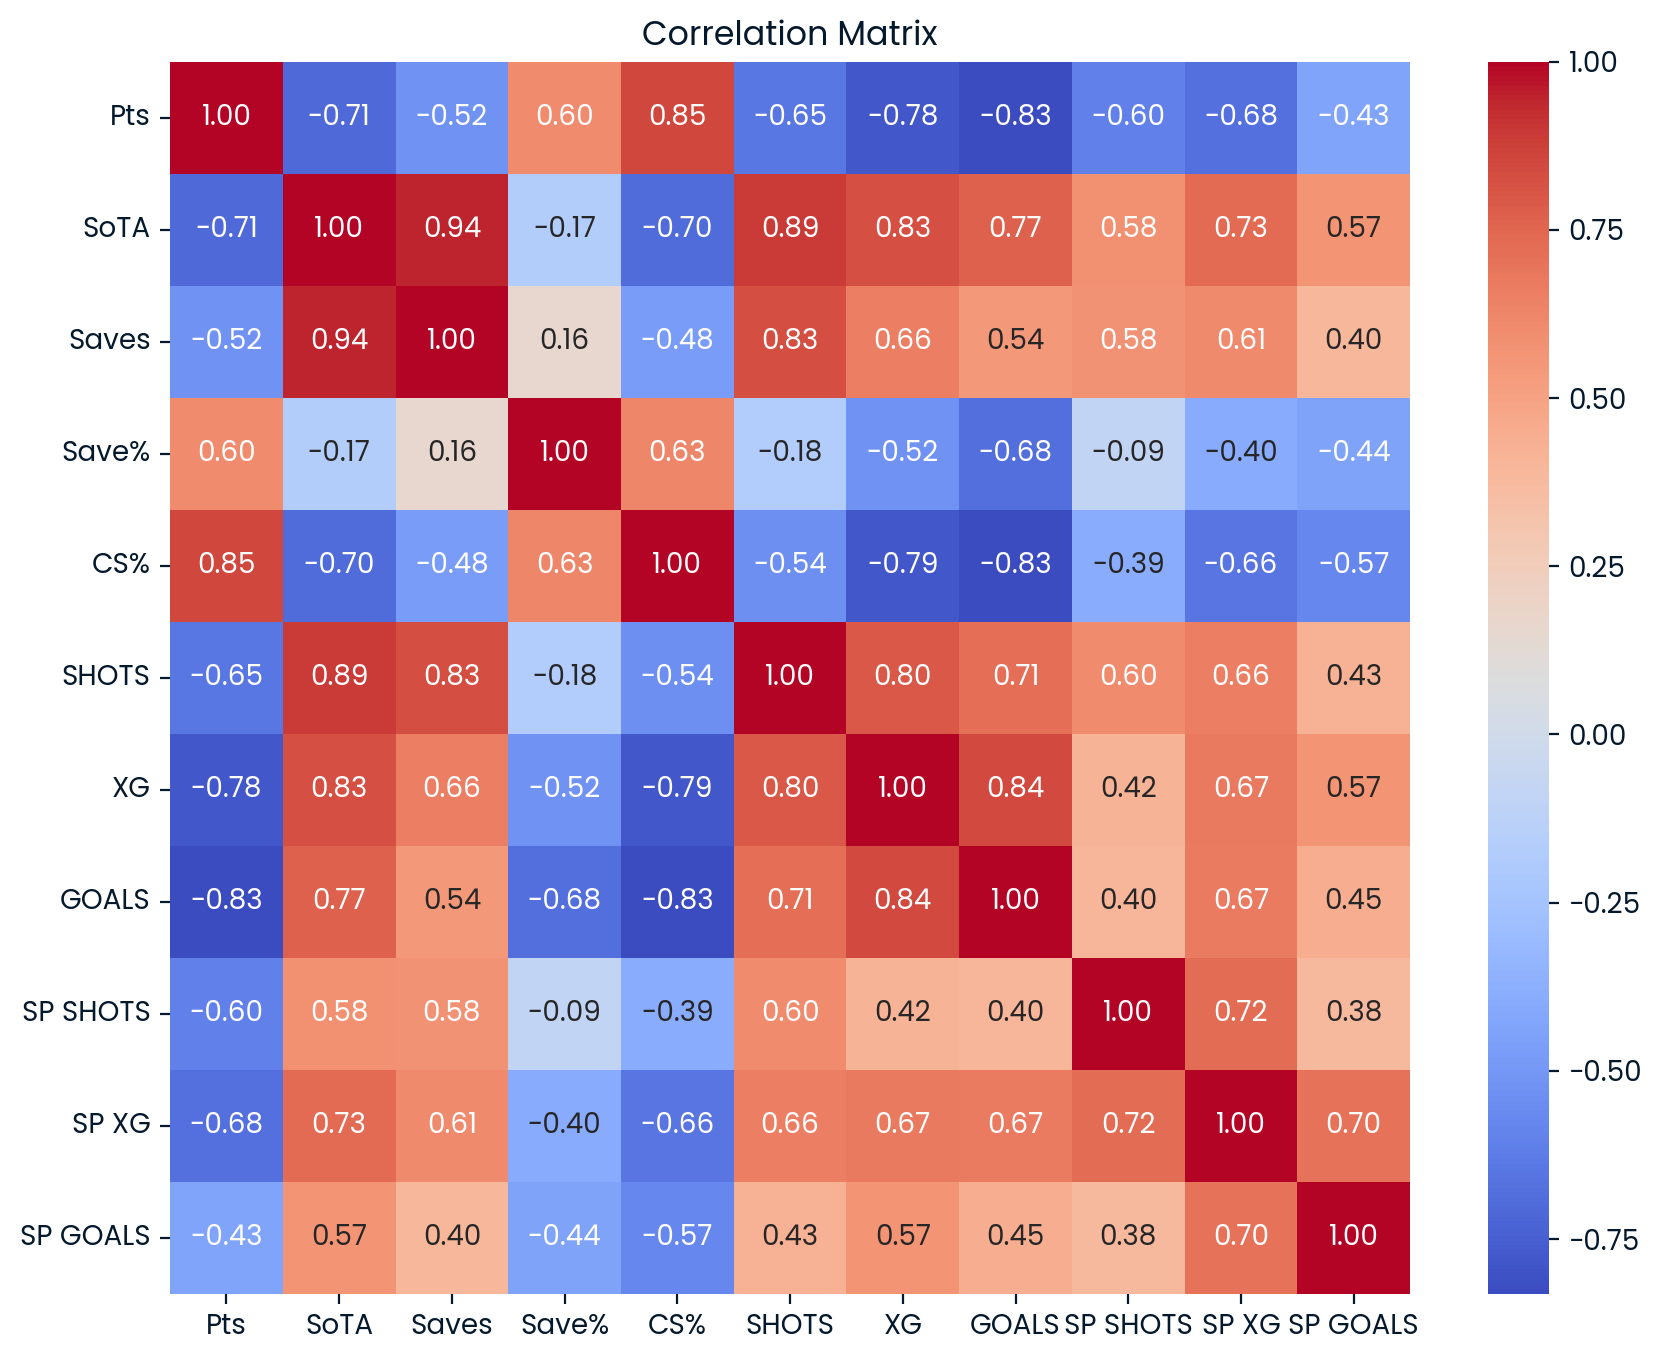

In [68]:
# To see which stats has strong relationship with pts I created heatmap again
# Remove non-numeric columns from the DataFrame
def_stats_corr = def_stats.merge(expected_goals_against, left_on="Squad", right_on="TEAM")
def_stats_corr = def_stats_corr[["Pts", "Squad", "SoTA", "Saves", "Save%", "CS%", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS"]]
def_stats_corr_map = def_stats_corr.select_dtypes(include=["number"]).corr()
def_stats_corr_map

plt.figure(figsize=(10, 8))
sns.heatmap(def_stats_corr_map, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.yticks(rotation=0)
plt.show()

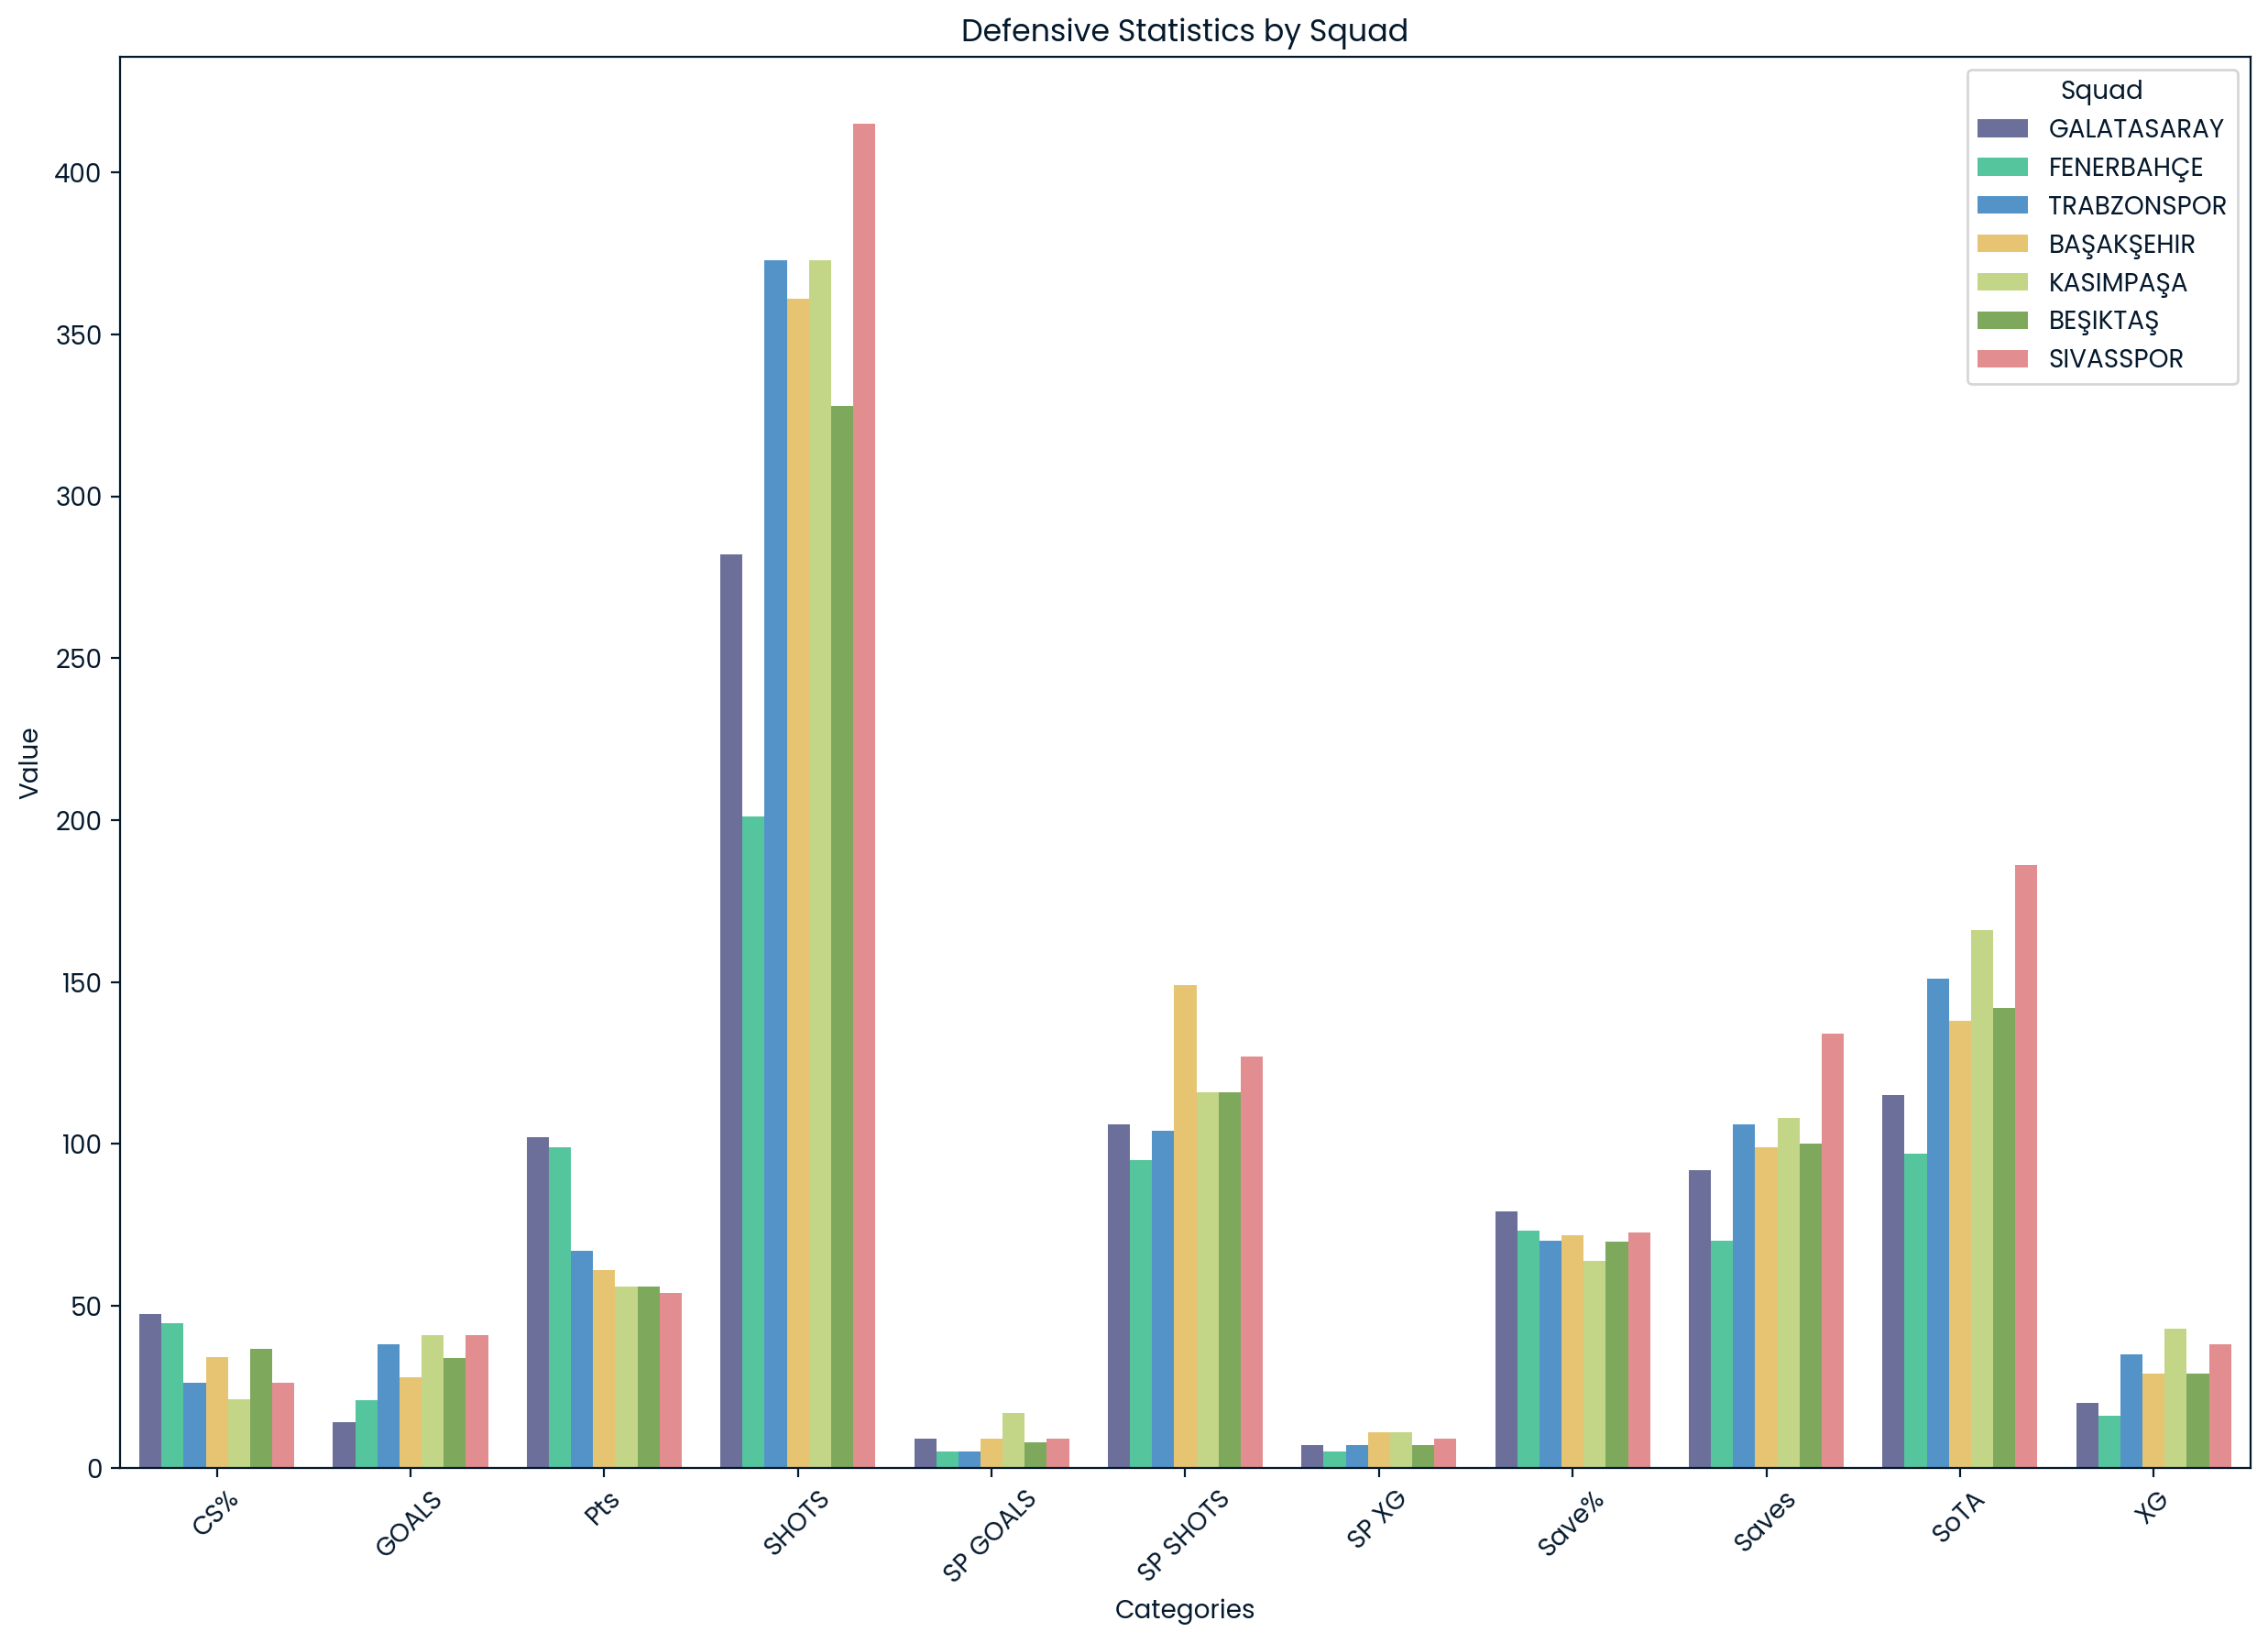

In [69]:
# Melted barplot for x=columns
melted_def_stats_top_seven_visual = def_stats_top_seven_visual.melt(id_vars=["Squad"], var_name="Statistic", value_name="Value")

desired_order = ["GALATASARAY", "FENERBAHÇE", "TRABZONSPOR", "BAŞAKŞEHIR", "KASIMPAŞA", "BEŞIKTAŞ", "SIVASSPOR"]
melted_def_stats_top_seven_visual["Squad"] = pd.Categorical(melted_def_stats_top_seven_visual["Squad"], categories=desired_order, ordered=True)

melted_def_stats_top_seven_visual["Ranking"] = melted_def_stats_top_seven_visual.groupby("Statistic")["Value"].rank(method="first", ascending=False)
melted_def_stats_top_seven_visual_sorted = melted_def_stats_top_seven_visual.sort_values(by=["Statistic", "Ranking"])

plt.figure(figsize=(15, 10))
sns.barplot(data=melted_def_stats_top_seven_visual_sorted, x="Statistic", y="Value", hue="Squad", dodge=True, hue_order=desired_order)
plt.title("Defensive Statistics by Squad")
plt.xlabel("Categories")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title="Squad")
plt.show()

In [70]:
# Let's see ranking about this categories to be understand more clear this plot
rank = def_stats_top_seven_visual[['Squad', 'SoTA', 'Saves', 'Save%', 'CS%', 'SHOTS', 'XG', 'GOALS', 'SP SHOTS', 'SP XG', 'SP GOALS']]
for statistic in rank.columns[1:]:
    rank[f'{statistic}_Rank'] = rank[statistic].rank(method='dense', ascending=False)
rank

,Squad,SoTA,Saves,Save%,CS%,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS,SoTA_Rank,Saves_Rank,Save%_Rank,CS%_Rank,SHOTS_Rank,XG_Rank,GOALS_Rank,SP SHOTS_Rank,SP XG_Rank,SP GOALS_Rank
0,GALATASARAY,115,92,79.1,47.4,282,20,14,106,7,9,6.0,6.0,1.0,1.0,5.0,5.0,6.0,4.0,3.0,2.0
1,FENERBAHÇE,97,70,73.2,44.7,201,16,21,95,5,5,7.0,7.0,2.0,2.0,6.0,6.0,5.0,6.0,4.0,4.0
2,TRABZONSPOR,151,106,70.2,26.3,373,35,38,104,7,5,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,3.0,4.0
3,BAŞAKŞEHIR,138,99,71.7,34.2,361,29,28,149,11,9,5.0,5.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,2.0
4,KASIMPAŞA,166,108,63.9,21.1,373,43,41,116,11,17,2.0,2.0,7.0,6.0,2.0,1.0,1.0,3.0,1.0,1.0
5,BEŞIKTAŞ,142,100,69.7,36.8,328,29,34,116,7,8,4.0,4.0,6.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0
6,SIVASSPOR,186,134,72.6,26.3,415,38,41,127,9,9,1.0,1.0,3.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0


In [71]:
# Select recommended columns
first_column = rank.columns[0]

last_five_columns = rank.columns[-10:]

selected_columns = [first_column] + list(last_five_columns)
rank_selected = rank[selected_columns]
rank_selected

,Squad,SoTA_Rank,Saves_Rank,Save%_Rank,CS%_Rank,SHOTS_Rank,XG_Rank,GOALS_Rank,SP SHOTS_Rank,SP XG_Rank,SP GOALS_Rank
0,GALATASARAY,6.0,6.0,1.0,1.0,5.0,5.0,6.0,4.0,3.0,2.0
1,FENERBAHÇE,7.0,7.0,2.0,2.0,6.0,6.0,5.0,6.0,4.0,4.0
2,TRABZONSPOR,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,3.0,4.0
3,BAŞAKŞEHIR,5.0,5.0,4.0,4.0,3.0,4.0,4.0,1.0,1.0,2.0
4,KASIMPAŞA,2.0,2.0,7.0,6.0,2.0,1.0,1.0,3.0,1.0,1.0
5,BEŞIKTAŞ,4.0,4.0,6.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0
6,SIVASSPOR,1.0,1.0,3.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0


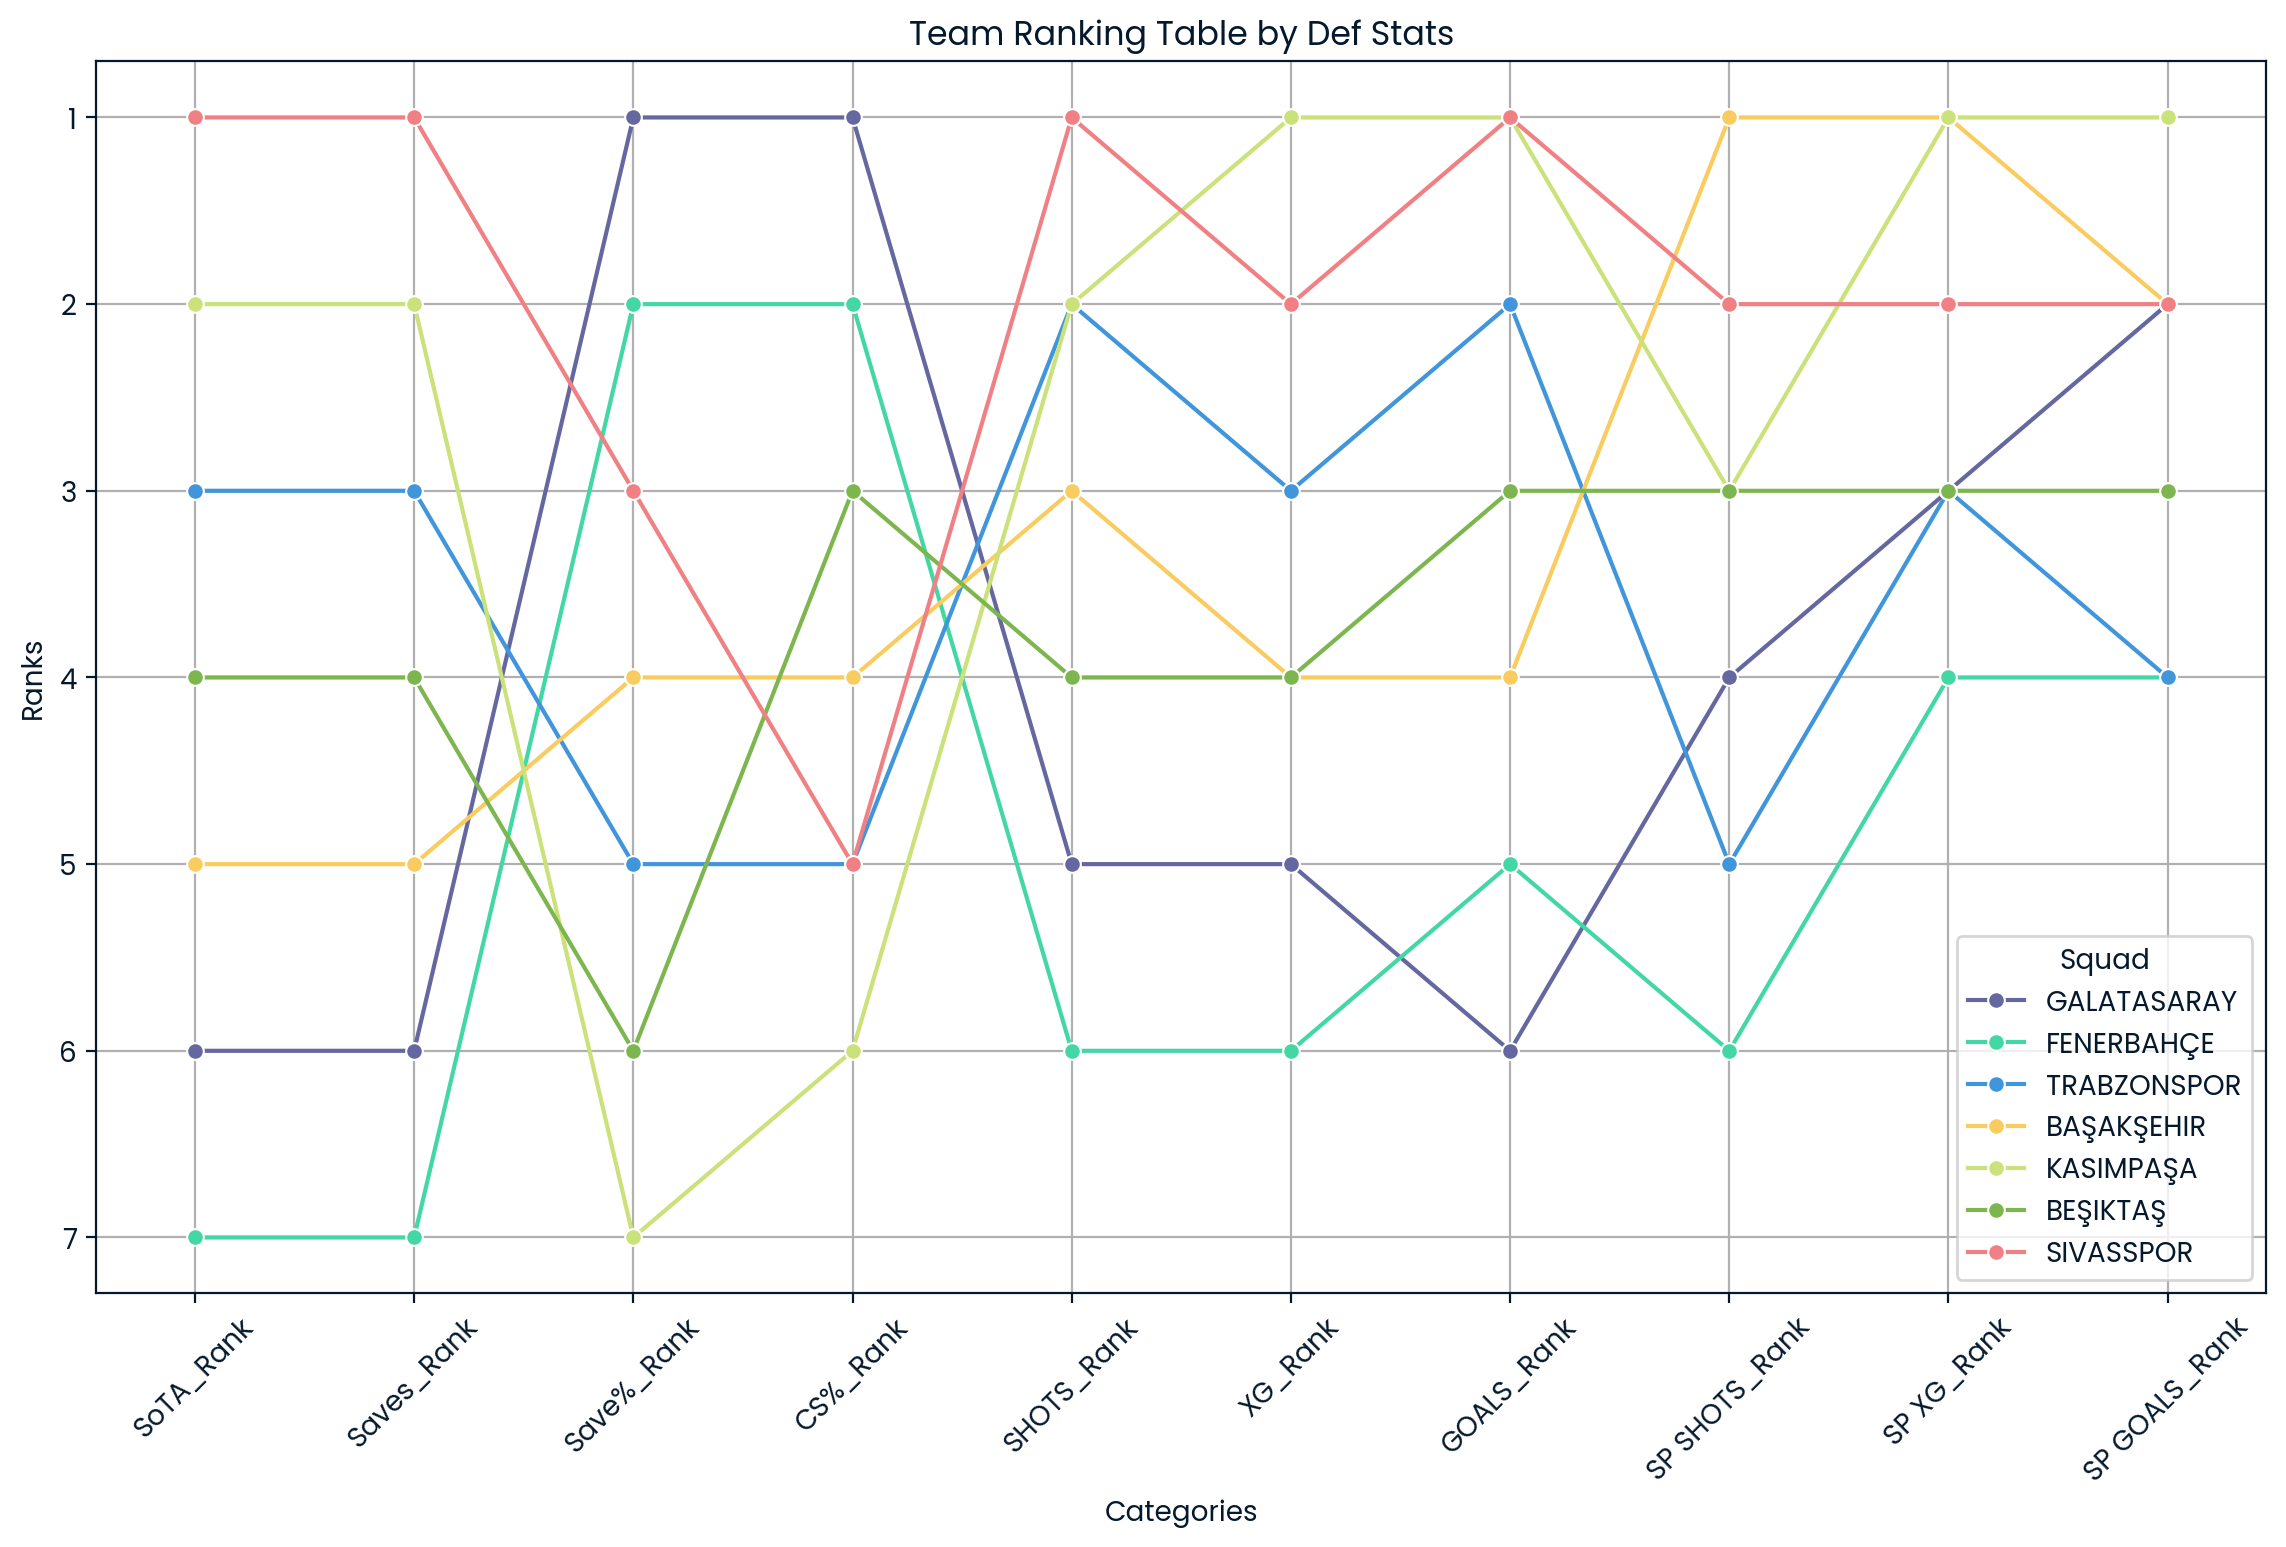

In [72]:
# Checking this ranking team by team as a lineplot
rank_selected_melted = rank_selected.melt(id_vars=["Squad"], var_name="Categories", value_name="Rank")

plt.figure(figsize=(14, 8))
sns.lineplot(data=rank_selected_melted, x="Categories", y="Rank", hue="Squad", marker="o")

plt.title("Team Ranking Table by Def Stats")
plt.xlabel("Categories")
plt.ylabel("Ranks")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.legend(title="Squad")
plt.grid(True)

plt.show()

In [73]:
# I take avg to see more clear
rank_columns_avg_7 = ["SoTA_Rank", "Saves_Rank", "SHOTS_Rank", "XG_Rank", "GOALS_Rank", "SP SHOTS_Rank"]
rank_selected["Avg_Rank"] = rank_selected[rank_columns_avg_7].mean(axis=1)
sorted_rank_selected = rank_selected[["Squad", "Avg_Rank"]].sort_values(by="Avg_Rank")
print(sorted_rank_selected)

         Squad  Avg_Rank
6    SIVASSPOR  1.333333
4    KASIMPAŞA  1.833333
2  TRABZONSPOR  3.000000
3   BAŞAKŞEHIR  3.666667
5     BEŞIKTAŞ  3.666667
0  GALATASARAY  5.333333
1   FENERBAHÇE  6.166667


In [74]:
# All league teams avg_ranking

def_stats_all_teams = def_stats[["Pts", "Squad", "GA90", "SoTA", "Saves", "Save%", "CS%"]]
def_stats_all_teams = def_stats_all_teams.merge(expected_goals_against, left_on="Squad", right_on="TEAM")
def_stats_all_teams = def_stats_all_teams[["Pts", "Squad", "SoTA", "Saves", "Save%", "CS%", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS"]]
def_stats_all_teams

rank_all = def_stats_all_teams[["Squad", "SoTA", "Saves", "Save%", "CS%", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS"]]
for statistic in rank_all.columns[1:]:
    rank_all[f'{statistic}_Rank'] = rank_all[statistic].rank(method="dense", ascending=False)

first_column_all_teams = rank_all.columns[0]
last_five_columns_all_teams = rank_all.columns[-10:]

selected_columns_all_teams = [first_column_all_teams] + list(last_five_columns_all_teams)
rank_selected_all_teams = rank_all[selected_columns]
rank_selected_all_teams    

,Squad,SoTA_Rank,Saves_Rank,Save%_Rank,CS%_Rank,SHOTS_Rank,XG_Rank,GOALS_Rank,SP SHOTS_Rank,SP XG_Rank,SP GOALS_Rank
0,GALATASARAY,16.0,15.0,1.0,1.0,16.0,12.0,13.0,15.0,7.0,5.0
1,FENERBAHÇE,17.0,17.0,3.0,2.0,17.0,13.0,12.0,17.0,8.0,8.0
2,TRABZONSPOR,12.0,11.0,10.0,6.0,7.0,8.0,6.0,16.0,7.0,8.0
3,BAŞAKŞEHIR,14.0,14.0,7.0,4.0,8.0,10.0,11.0,4.0,3.0,5.0
4,KASIMPAŞA,8.0,9.0,15.0,8.0,7.0,3.0,4.0,12.0,3.0,1.0
5,BEŞIKTAŞ,13.0,13.0,11.0,3.0,13.0,10.0,9.0,12.0,7.0,6.0
6,SIVASSPOR,3.0,3.0,6.0,6.0,2.0,6.0,4.0,8.0,5.0,5.0
7,ALANYASPOR,10.0,10.0,11.0,7.0,9.0,9.0,8.0,5.0,6.0,4.0
8,RIZESPOR,5.0,2.0,5.0,4.0,4.0,8.0,4.0,2.0,2.0,5.0
9,ANTALYASPOR,8.0,5.0,4.0,8.0,12.0,7.0,9.0,14.0,4.0,4.0


In [75]:
# AVG rank of all teams
rank_columns_avg_all = ["SoTA_Rank", "Saves_Rank", "SHOTS_Rank", "XG_Rank", "GOALS_Rank", "SP SHOTS_Rank"]
rank_selected_all_teams["Avg_Rank"] = rank_selected_all_teams[rank_columns_avg_all].mean(axis=1)
sorted_rank_selected_all_teams = rank_selected_all_teams[["Squad", "Avg_Rank"]].sort_values(by="Avg_Rank")
print(sorted_rank_selected_all_teams)

               Squad   Avg_Rank
19      İSTANBULSPOR   1.166667
8           RIZESPOR   4.166667
13       KAYSERISPOR   4.333333
6          SIVASSPOR   4.333333
11   ADANA DEMIRSPOR   5.000000
10      GAZIANTEP FK   6.500000
4          KASIMPAŞA   7.166667
18        PENDIKSPOR   7.166667
14         HATAYSPOR   7.500000
16        ANKARAGÜCÜ   8.333333
7         ALANYASPOR   8.500000
9        ANTALYASPOR   9.166667
17  FATIH KARAGÜMRÜK   9.500000
2        TRABZONSPOR  10.000000
3         BAŞAKŞEHIR  10.166667
15         KONYASPOR  11.333333
5           BEŞIKTAŞ  11.666667
12        SAMSUNSPOR  11.833333
0        GALATASARAY  14.500000
1         FENERBAHÇE  15.500000


In [76]:
# Let's check are teams finished +/- 4 positions due to their avg rankings
# I reversed one of Rk or ranking column. Because they need to be oppposite. Not similar.

rank_selected_all_teams["ranking"] = rank_selected_all_teams["Avg_Rank"].rank(method="dense", ascending=False)
rank_selected_all_teams.sort_values("ranking", ascending=True)
standing_ranking_merged = rank_selected_all_teams.merge(süper_lig, on="Squad")
standing_ranking_merged = standing_ranking_merged[["Squad", "ranking", "Rk"]]
standing_ranking_merged["Rank_Diff"] = (standing_ranking_merged["ranking"] - standing_ranking_merged["Rk"]).abs()
standing_ranking_merged["Within_Range3"] = standing_ranking_merged["Rank_Diff"] <= 3
standing_ranking_merged["Within_Range"] = standing_ranking_merged["Rank_Diff"] <= 4
standing_ranking_merged["Within_Range5"] = standing_ranking_merged["Rank_Diff"] <= 5

print(standing_ranking_merged["Within_Range3"].value_counts(normalize=True))
print(standing_ranking_merged["Within_Range"].value_counts(normalize=True))
print(standing_ranking_merged["Within_Range5"].value_counts(normalize=True))
standing_ranking_merged

Within_Range3
True     0.55
False    0.45
Name: proportion, dtype: float64
Within_Range
True     0.6
False    0.4
Name: proportion, dtype: float64
Within_Range5
True     0.6
False    0.4
Name: proportion, dtype: float64


,Squad,ranking,Rk,Rank_Diff,Within_Range3,Within_Range,Within_Range5
0,GALATASARAY,2.0,1,1.0,True,True,True
1,FENERBAHÇE,1.0,2,1.0,True,True,True
2,TRABZONSPOR,7.0,3,4.0,False,True,True
3,BAŞAKŞEHIR,6.0,4,2.0,True,True,True
4,KASIMPAŞA,13.0,5,8.0,False,False,False
5,BEŞIKTAŞ,4.0,6,2.0,True,True,True
6,SIVASSPOR,16.0,7,9.0,False,False,False
7,ALANYASPOR,10.0,8,2.0,True,True,True
8,RIZESPOR,17.0,9,8.0,False,False,False
9,ANTALYASPOR,9.0,10,1.0,True,True,True


          Avg_Rank       Pts         W         D         L        GF        GA
Avg_Rank  1.000000  0.709760  0.685071 -0.289752 -0.700526  0.678922 -0.818985
Pts       0.709760  1.000000  0.989302 -0.546514 -0.923752  0.962437 -0.842592
W         0.685071  0.989302  1.000000 -0.662834 -0.858000  0.955892 -0.796619
D        -0.289752 -0.546514 -0.662834  1.000000  0.184109 -0.547518  0.248317
L        -0.700526 -0.923752 -0.858000  0.184109  1.000000 -0.879206  0.875379
GF        0.678922  0.962437  0.955892 -0.547518 -0.879206  1.000000 -0.762511
GA       -0.818985 -0.842592 -0.796619  0.248317  0.875379 -0.762511  1.000000


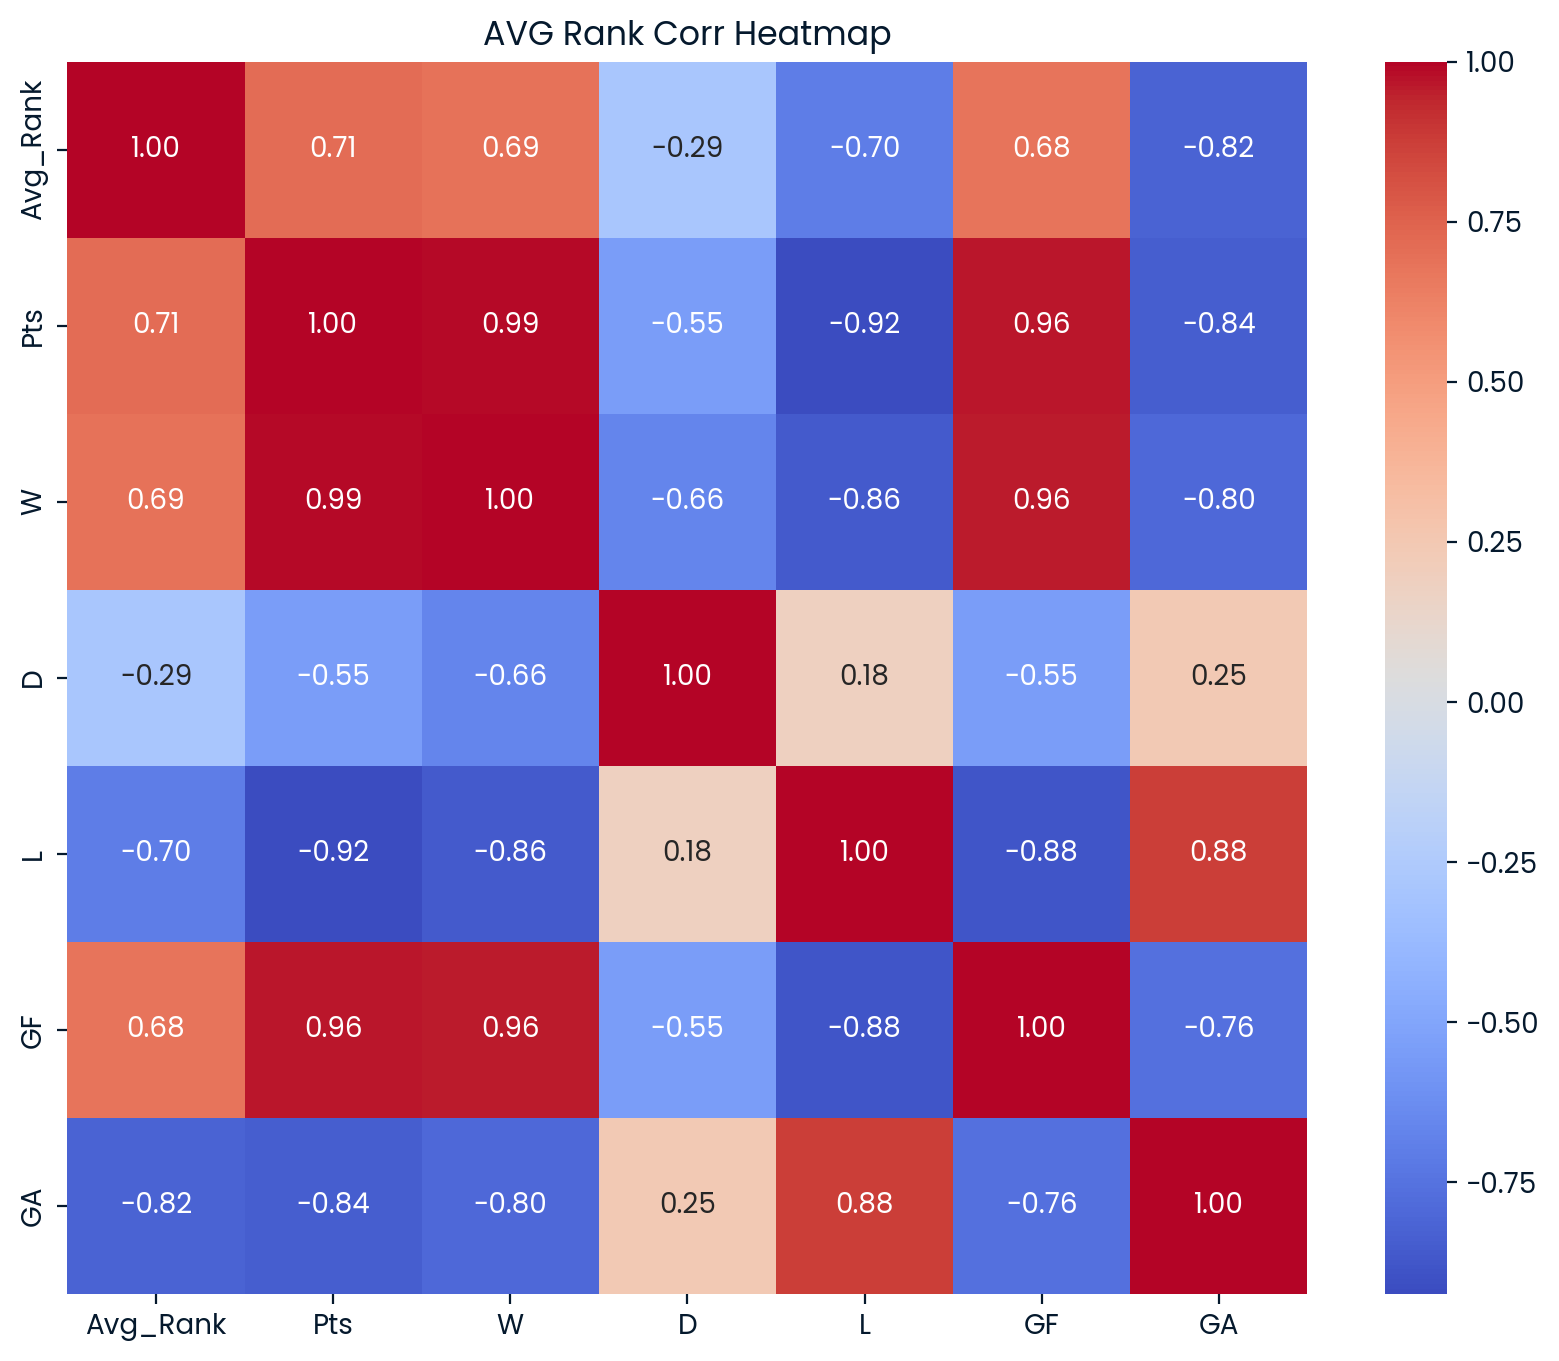

In [77]:
# And just to see, just check a heatmap and corr between avg_rank and point/standings
avg_rank_heatmap = rank_selected_all_teams.merge(süper_lig, on="Squad")
avg_rank_heatmap = avg_rank_heatmap[["Avg_Rank", "Pts", "W", "D", "L", "GF", "GA"]]
avg_rank_heatmap_corr = avg_rank_heatmap.corr()
print(avg_rank_heatmap_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(avg_rank_heatmap_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("AVG Rank Corr Heatmap")
plt.show()

Text(0, 0.5, 'Team Count')

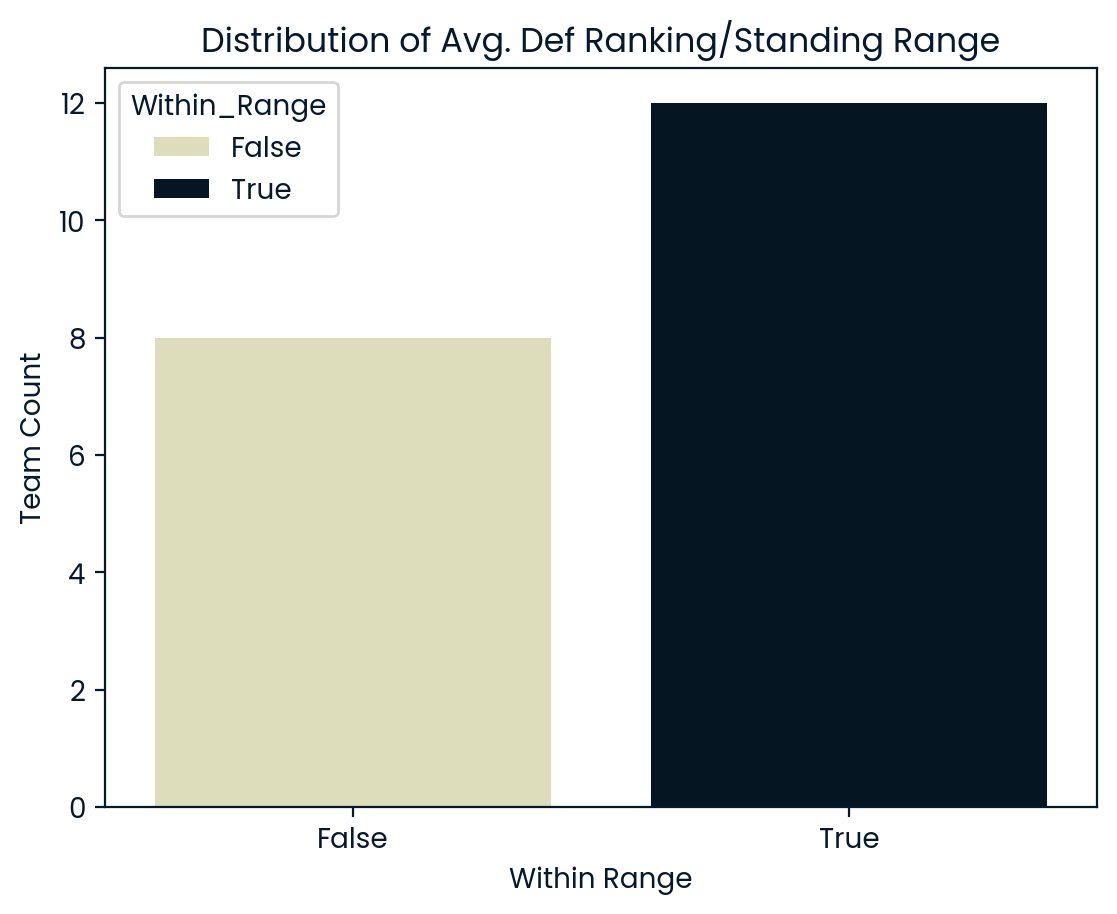

In [78]:
# Plotting the Within Range (4) column
palette = {True: "#021526", False: "#E2E2B6"}
sns.countplot(data=standing_ranking_merged, x="Within_Range", hue="Within_Range", palette=palette)
plt.title("Distribution of Avg. Def Ranking/Standing Range")
plt.xlabel("Within Range")
plt.ylabel("Team Count")

From here, I'm going to write code for offensive zones.

In [79]:
süper_lig.loc[süper_lig["Squad"] == "İSTANBULSPOR", "Squad"] = "ISTANBULSPOR"
süper_lig.loc[süper_lig["Squad"] == "BAŞAKŞEHIR", "Squad"] = "ISTANBUL BASAKSEHIR"
süper_lig.loc[süper_lig["Squad"] == "KASIMPAŞA", "Squad"] = "KASIMPASA"
süper_lig.loc[süper_lig["Squad"] == "BEŞIKTAŞ", "Squad"] = "BESIKTAS"
süper_lig.loc[süper_lig["Squad"] == "RIZESPOR", "Squad"] = "CAYKUR RIZESPOR"

squad_standard_stats.loc[squad_standard_stats["Squad"] == "İSTANBULSPOR", "Squad"] = "ISTANBULSPOR"
squad_standard_stats.loc[squad_standard_stats["Squad"] == "BAŞAKŞEHIR", "Squad"] = "ISTANBUL BASAKSEHIR"
squad_standard_stats.loc[squad_standard_stats["Squad"] == "KASIMPAŞA", "Squad"] = "KASIMPASA"
squad_standard_stats.loc[squad_standard_stats["Squad"] == "BEŞIKTAŞ", "Squad"] = "BESIKTAS"
squad_standard_stats.loc[squad_standard_stats["Squad"] == "RIZESPOR", "Squad"] = "CAYKUR RIZESPOR"

squad_shoting.loc[squad_shoting["Squad"] == "İSTANBULSPOR", "Squad"] = "ISTANBULSPOR"
squad_shoting.loc[squad_shoting["Squad"] == "BAŞAKŞEHIR", "Squad"] = "ISTANBUL BASAKSEHIR"
squad_shoting.loc[squad_shoting["Squad"] == "KASIMPAŞA", "Squad"] = "KASIMPASA"
squad_shoting.loc[squad_shoting["Squad"] == "BEŞIKTAŞ", "Squad"] = "BESIKTAS"
squad_shoting.loc[squad_shoting["Squad"] == "RIZESPOR", "Squad"] = "CAYKUR RIZESPOR"

offensive_selected_columns = expected_goals_for.merge(passes_per_sequence, on="TEAM") \
                            .merge(team_sequence_pressures, on="TEAM", suffixes=('', '_tsp')) \
                            .merge(süper_lig, left_on="TEAM", right_on="Squad") \
                            .merge(squad_standard_stats, left_on="TEAM", right_on="Squad")

offensive_selected_columns = offensive_selected_columns[["TEAM", "POS", "W", "GF", "XG RATIO", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS", "BUILD UP ATTACKS", "DIRECT ATTACKS", "PPDA", "SHOT ENDING", "GOAL ENDING"]]
offensive_selected_columns

,TEAM,POS,W,GF,XG RATIO,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS,BUILD UP ATTACKS,DIRECT ATTACKS,PPDA,SHOT ENDING,GOAL ENDING
0,GALATASARAY,1,33,92,0.20,525,52.99,64,203,16.16,15,97,75,7.3,64,3
1,FENERBAHÇE,2,31,99,0.14,504,66.51,70,147,13.27,13,88,71,9.4,80,16
2,TRABZONSPOR,3,21,69,0.20,361,35.13,47,149,9.55,14,79,50,10.6,45,5
3,ISTANBUL BASAKSEHIR,4,18,57,0.19,323,37.84,41,115,9.94,9,65,47,12.4,27,1
4,KASIMPASA,5,16,62,0.21,403,36.28,41,129,10.77,13,27,76,12.2,57,8
5,BESIKTAS,6,16,52,0.22,375,33.66,35,133,11.04,13,57,73,10.2,41,4
6,SIVASSPOR,7,14,47,0.21,299,28.19,32,130,8.78,9,30,84,16.5,30,0
7,ALANYASPOR,8,12,53,0.19,338,37.68,40,107,9.92,7,75,68,13.2,39,4
8,CAYKUR RIZESPOR,9,14,48,0.23,357,37.50,33,133,11.65,13,32,63,12.5,36,4
9,ANTALYASPOR,10,12,44,0.27,343,26.95,32,152,11.61,7,72,47,11.7,48,2


In [80]:
# Only GS and FB stats
offensive_selected_columns_gs_fb = offensive_selected_columns.loc[offensive_selected_columns["TEAM"].isin(["GALATASARAY", "FENERBAHÇE"])]
offensive_selected_columns_gs_fb

,TEAM,POS,W,GF,XG RATIO,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS,BUILD UP ATTACKS,DIRECT ATTACKS,PPDA,SHOT ENDING,GOAL ENDING
0,GALATASARAY,1,33,92,0.20,525,52.99,64,203,16.16,15,97,75,7.3,64,3
1,FENERBAHÇE,2,31,99,0.14,504,66.51,70,147,13.27,13,88,71,9.4,80,16


There is a slight difference between FBref shooting stats and The Analyst stats. At The Analyst, shooting stats are lower than FBref stats. This might be because of whether defensive blocking is included or not. After this merging, I'm going to check the difference between these two datasets.

In [81]:
# Compare PASS BETWEEN GS AND FB
pass_selected_columns = passes_per_sequence.merge(squad_standard_stats, left_on="TEAM", right_on="Squad")
pass_selected_columns = pass_selected_columns[["TEAM", "Poss", "SEQUENCE TIME", "PASSES PER SEQUENCE", "DIRECT SPEED", "10+ PASS OP SEQUENCES"]]
pass_selected_columns_gs_fb = pass_selected_columns[pass_selected_columns["TEAM"].isin(["GALATASARAY", "FENERBAHÇE"])]
pass_selected_columns_gs_fb

,TEAM,Poss,SEQUENCE TIME,PASSES PER SEQUENCE,DIRECT SPEED,10+ PASS OP SEQUENCES
0,GALATASARAY,61.0,9.32,3.38,2.06,343
1,FENERBAHÇE,57.1,8.94,3.38,2.08,333


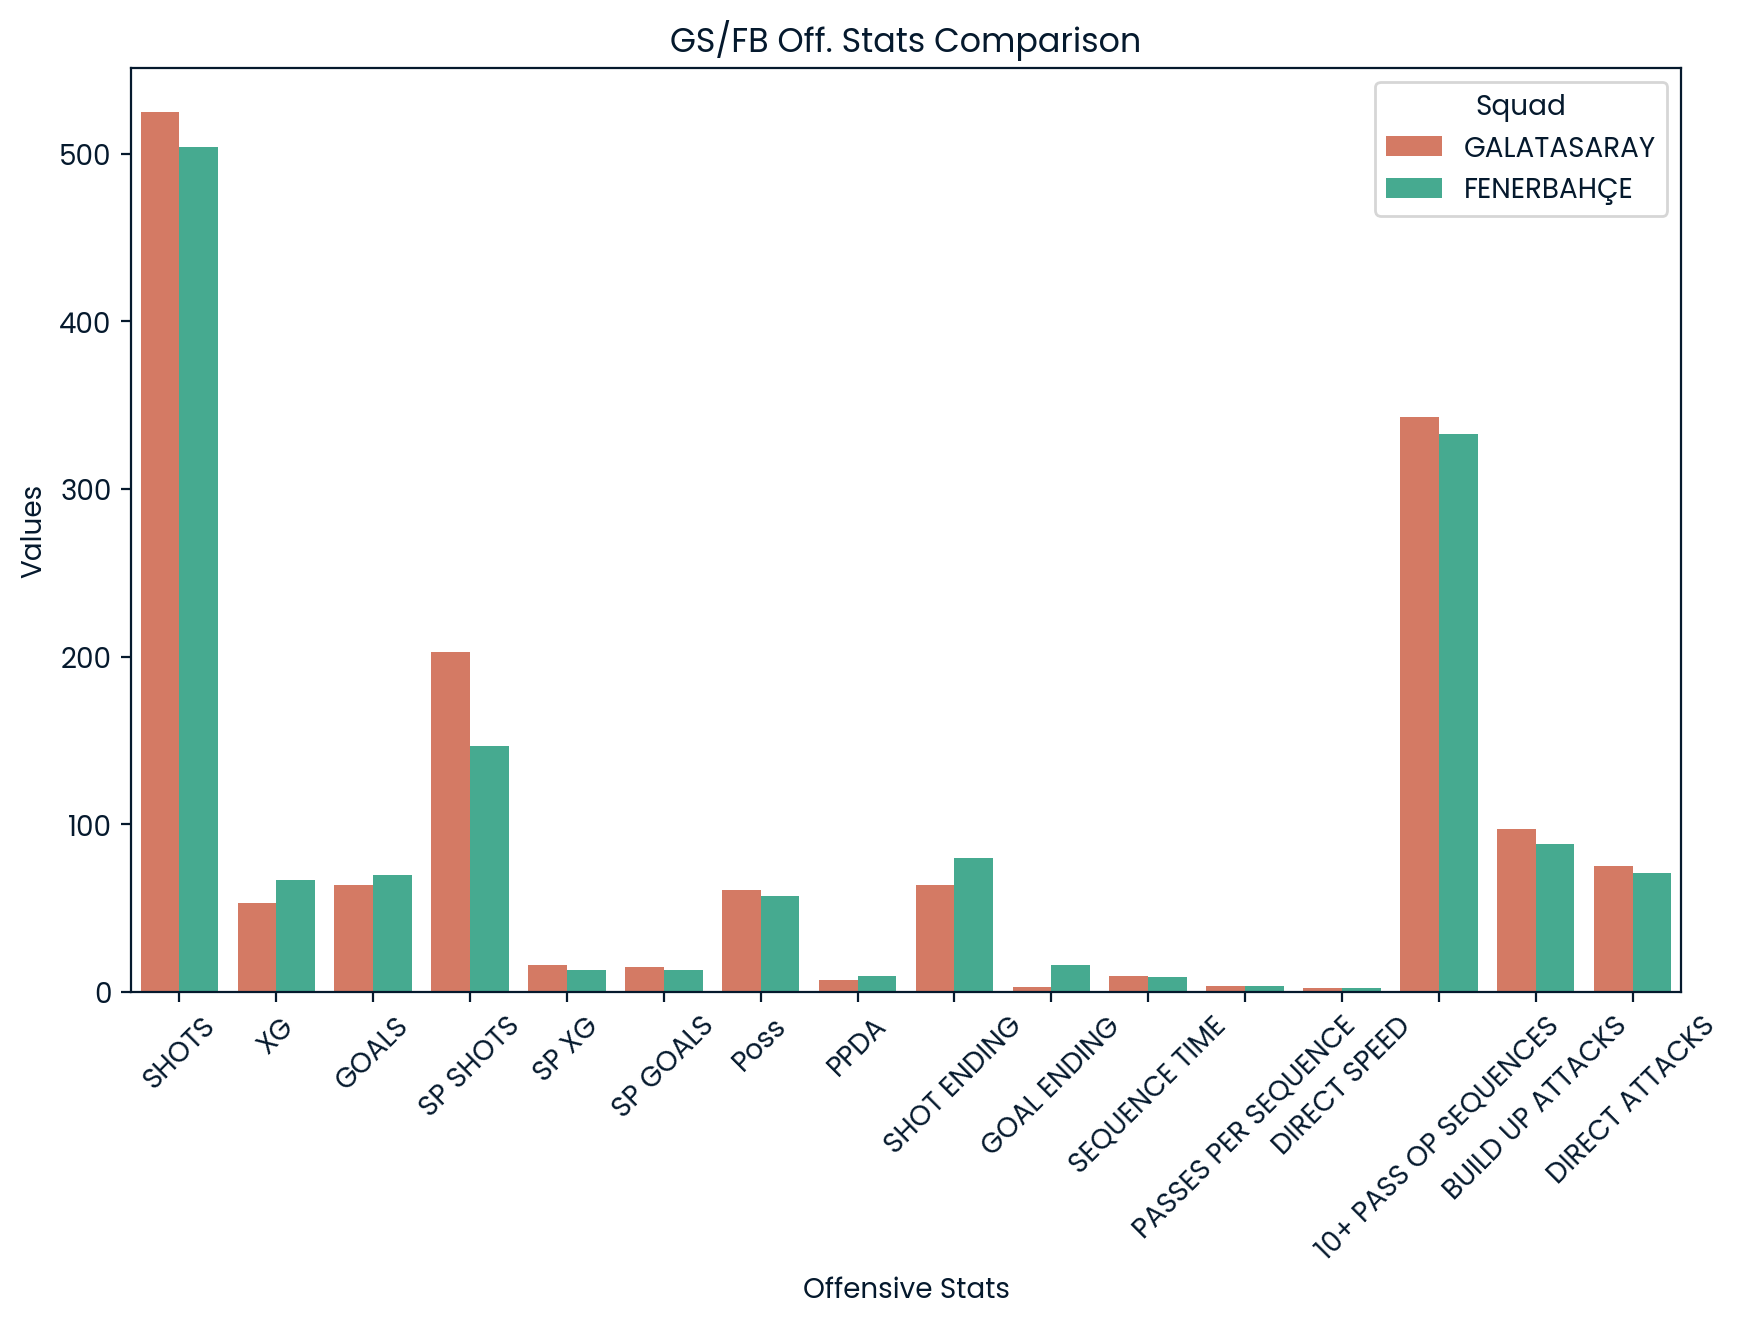

In [82]:
# GS/FB Conparison by bar plot

combined_offensive_gs_fb = offensive_selected_columns_gs_fb.merge(pass_selected_columns_gs_fb, on="TEAM")

combined_offensive_gs_fb =combined_offensive_gs_fb[["TEAM", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS", "Poss", "PPDA", "SHOT ENDING", "GOAL ENDING", "SEQUENCE TIME", "PASSES PER SEQUENCE", "DIRECT SPEED", "10+ PASS OP SEQUENCES", "BUILD UP ATTACKS", "DIRECT ATTACKS"]]

melted_combined_offensive_gs_fb = combined_offensive_gs_fb.melt(id_vars=["TEAM"], var_name="Statistic", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_combined_offensive_gs_fb, x="Statistic", y="Value", hue="TEAM", palette=["#E76F51", "#36BA98"], dodge=True)

plt.xlabel("Offensive Stats")
plt.ylabel("Values")
plt.title("GS/FB Off. Stats Comparison")
plt.xticks(rotation=45)
plt.legend(title="Squad")
plt.show()

In [83]:
combined_offensive_gs_fb

,TEAM,SHOTS,XG,GOALS,SP SHOTS,SP XG,SP GOALS,Poss,PPDA,SHOT ENDING,GOAL ENDING,SEQUENCE TIME,PASSES PER SEQUENCE,DIRECT SPEED,10+ PASS OP SEQUENCES,BUILD UP ATTACKS,DIRECT ATTACKS
0,GALATASARAY,525,52.99,64,203,16.16,15,61.0,7.3,64,3,9.32,3.38,2.06,343,97,75
1,FENERBAHÇE,504,66.51,70,147,13.27,13,57.1,9.4,80,16,8.94,3.38,2.08,333,88,71


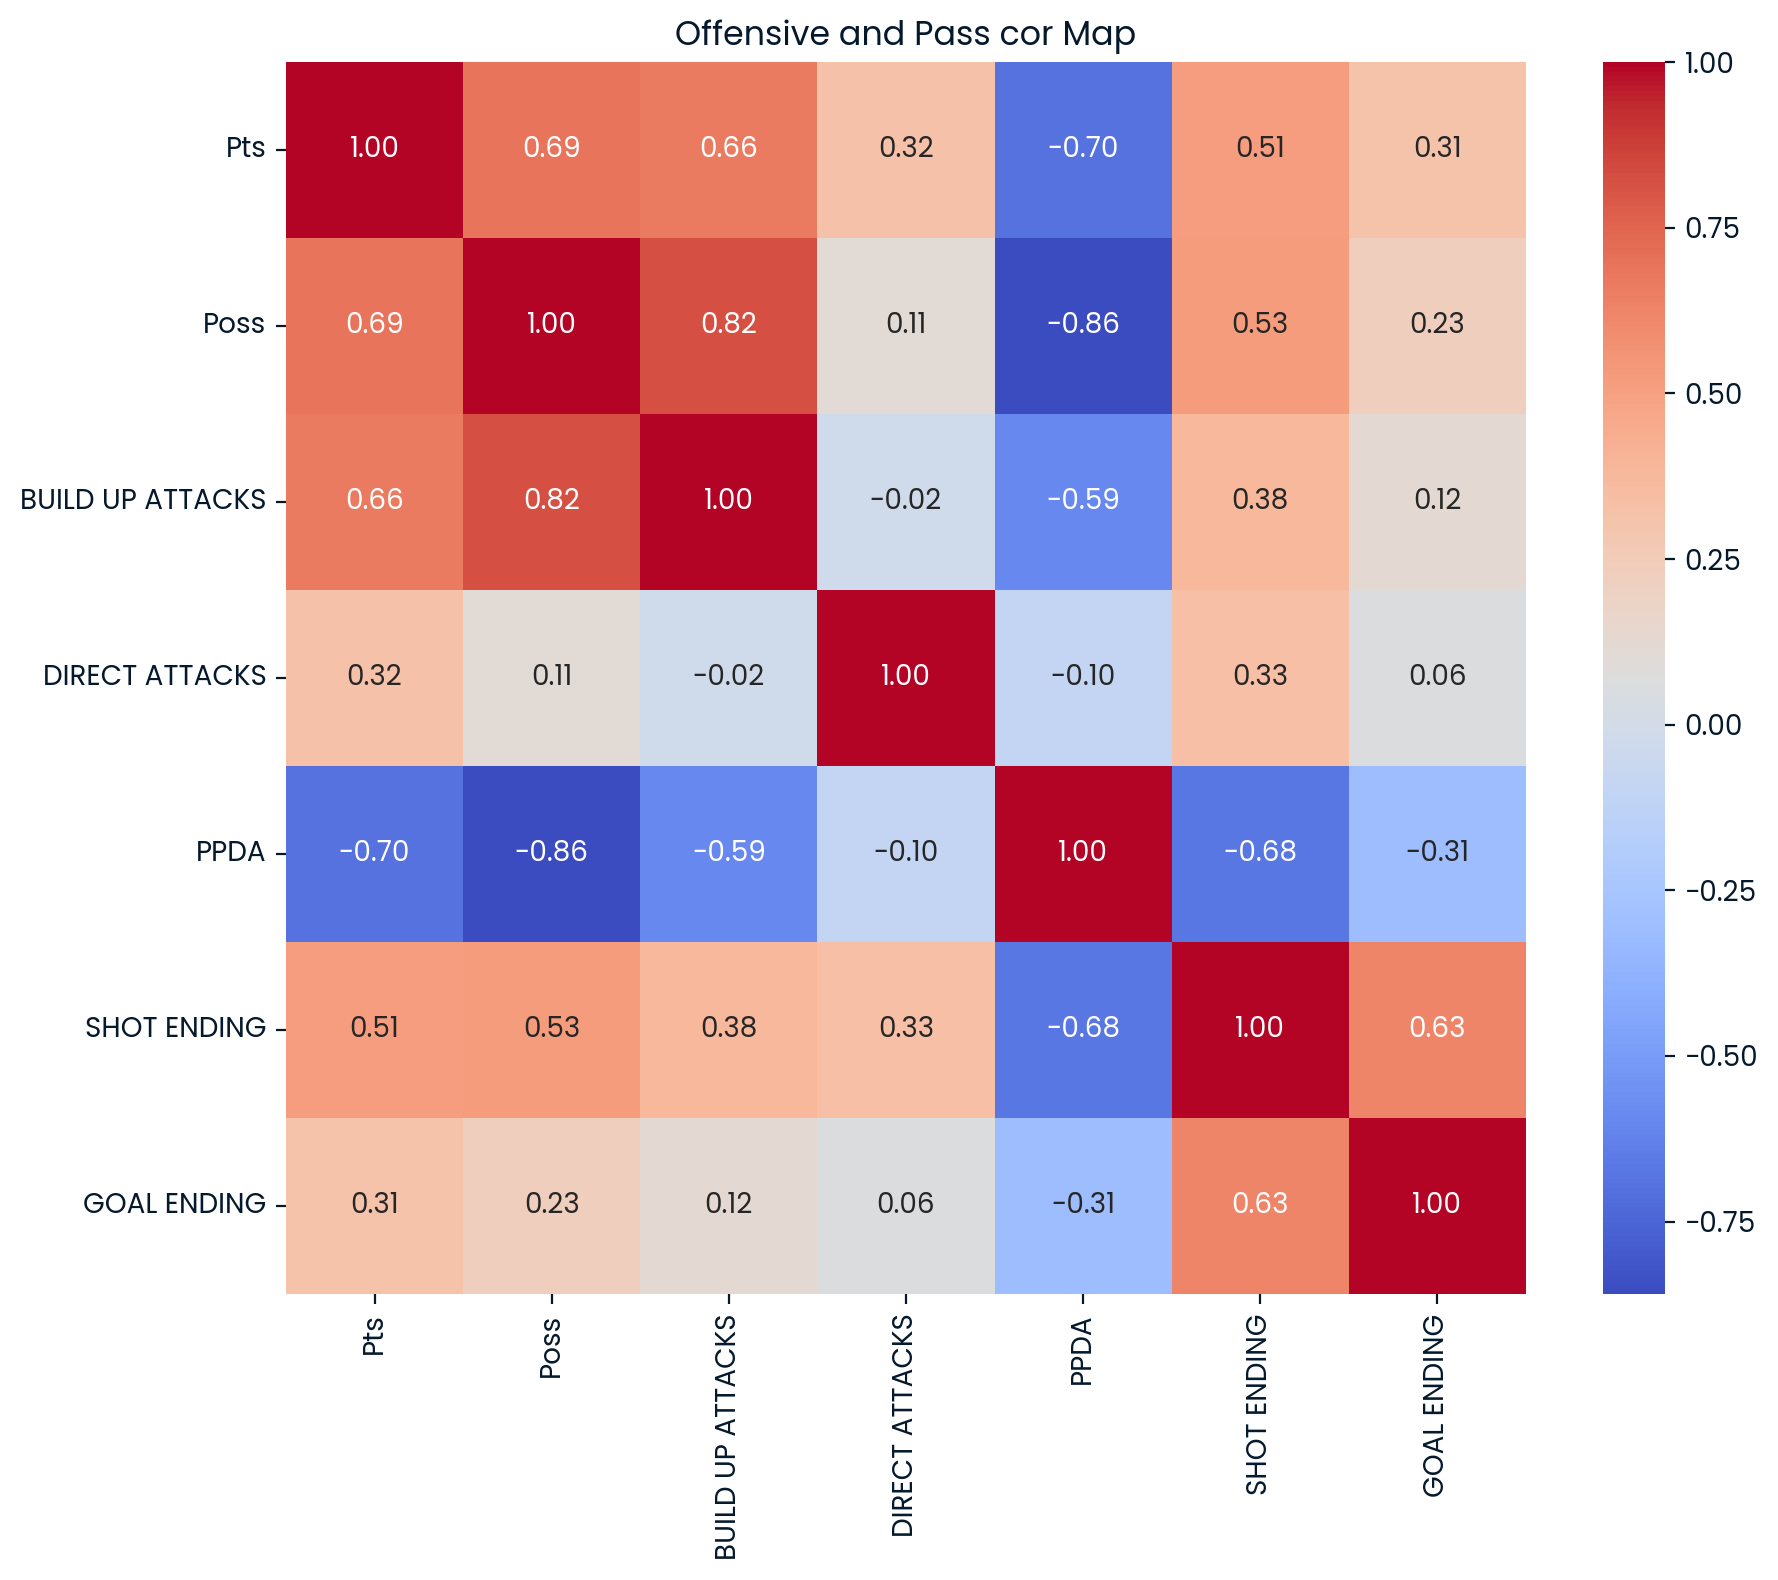

In [84]:
# I added poss column for see correlation
offensive_selected_columns_corr = offensive_selected_columns.merge(pass_selected_columns, on="TEAM")
offensive_selected_columns_corr = offensive_selected_columns_corr.merge(süper_lig, left_on="TEAM", right_on="Squad")
offensive_selected_columns_corr_map = offensive_selected_columns_corr[["Pts", "Poss", "BUILD UP ATTACKS", "DIRECT ATTACKS", "PPDA", "SHOT ENDING", "GOAL ENDING"]]

offensive_selected_columns_corr_map = offensive_selected_columns_corr_map.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(offensive_selected_columns_corr_map, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Offensive and Pass cor Map")
plt.show()

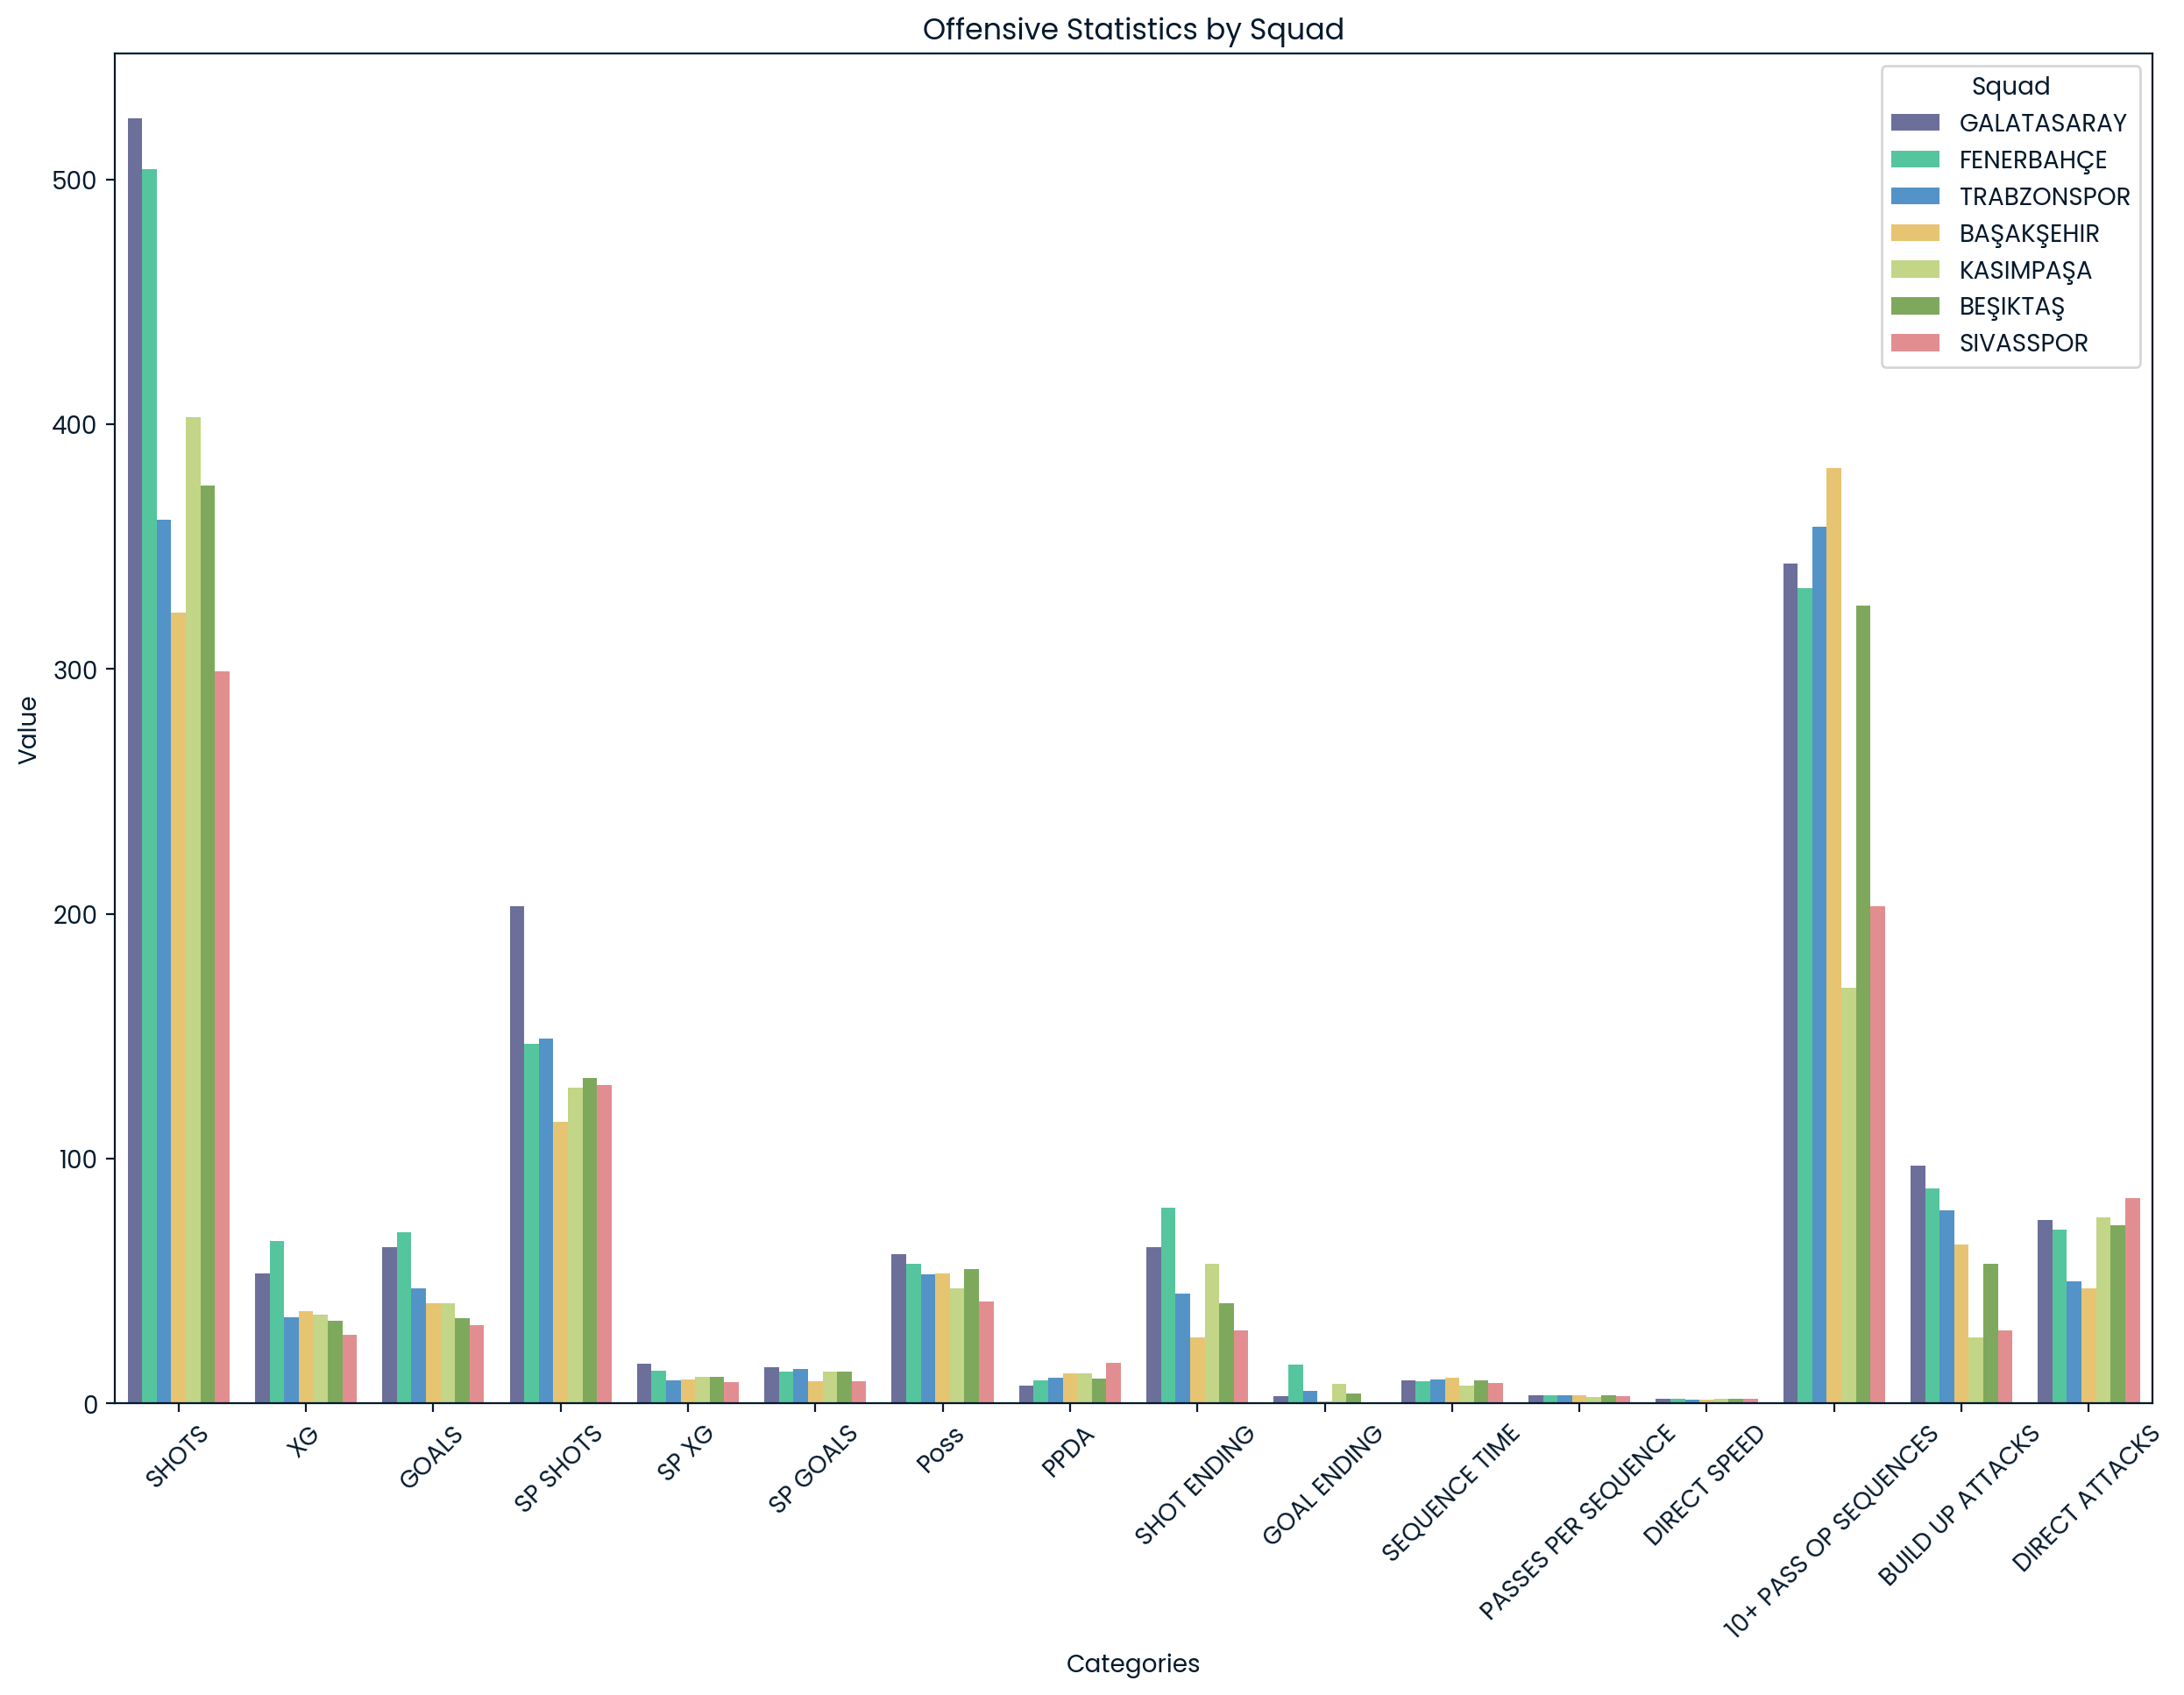

In [85]:
# Top 7 team for offensive stats. (melted them again)
offensive_selected_columns_corr_top_seven = offensive_selected_columns_corr.iloc[:7]
offensive_selected_columns_corr_top_seven = offensive_selected_columns_corr_top_seven[["TEAM", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS", "Poss", "PPDA", "SHOT ENDING", "GOAL ENDING", "SEQUENCE TIME", "PASSES PER SEQUENCE", "DIRECT SPEED", "10+ PASS OP SEQUENCES", "BUILD UP ATTACKS", "DIRECT ATTACKS"]]

# Correcting team names
offensive_selected_columns_corr_top_seven.loc[offensive_selected_columns_corr_top_seven["TEAM"] == "ISTANBUL BASAKSEHIR", "TEAM"] = "BAŞAKŞEHIR"
offensive_selected_columns_corr_top_seven.loc[offensive_selected_columns_corr_top_seven["TEAM"] == "KASIMPASA", "TEAM"] = "KASIMPAŞA"
offensive_selected_columns_corr_top_seven.loc[offensive_selected_columns_corr_top_seven["TEAM"] == "BESIKTAS", "TEAM"] = "BEŞIKTAŞ"
offensive_selected_columns_corr_top_seven.loc[offensive_selected_columns_corr_top_seven["TEAM"] == "SIVASSPOR", "TEAM"] = "SIVASSPOR"

desired_order = ["GALATASARAY", "FENERBAHÇE", "TRABZONSPOR", "BAŞAKŞEHIR", "KASIMPAŞA", "BEŞIKTAŞ", "SIVASSPOR"]
category_order = ["SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS", "Poss", "PPDA", "SHOT ENDING", "GOAL ENDING", "SEQUENCE TIME", "PASSES PER SEQUENCE", "DIRECT SPEED", "10+ PASS OP SEQUENCES", "BUILD UP ATTACKS", "DIRECT ATTACKS"]

melted_offensive_selected_columns_corr_top_seven = offensive_selected_columns_corr_top_seven.melt(id_vars=["TEAM"], var_name="Statistic", value_name="Value")
melted_offensive_selected_columns_corr_top_seven["TEAM"] = pd.Categorical(melted_offensive_selected_columns_corr_top_seven["TEAM"], categories=desired_order, ordered=True)
melted_offensive_selected_columns_corr_top_seven["Statistic"] = pd.Categorical(melted_offensive_selected_columns_corr_top_seven["Statistic"], categories=category_order, ordered=True)
melted_offensive_selected_columns_corr_top_seven["Ranking"] = melted_offensive_selected_columns_corr_top_seven.groupby("Statistic")["Value"].rank(method="first", ascending=False)    

melted_offensive_selected_columns_corr_top_seven = melted_offensive_selected_columns_corr_top_seven.sort_values(by=["Statistic", "Ranking"])

plt.figure(figsize=(15, 10))
sns.barplot(data=melted_offensive_selected_columns_corr_top_seven, x="Statistic", y="Value", hue="TEAM", dodge=True, hue_order=desired_order)
plt.title("Offensive Statistics by Squad")
plt.xlabel("Categories")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title="Squad")
plt.show()

In [86]:
offensive_rank = offensive_selected_columns_corr_top_seven[["TEAM", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS", "Poss", "PPDA", "SHOT ENDING", "GOAL ENDING", "SEQUENCE TIME", "PASSES PER SEQUENCE", "DIRECT SPEED", "10+ PASS OP SEQUENCES", "BUILD UP ATTACKS", "DIRECT ATTACKS"]]

for statistic in offensive_rank.columns[1:]:
    offensive_rank[f'{statistic}_Rank'] = offensive_rank[statistic].rank(method='dense', ascending=False)
    
offensive_rank_first_column = offensive_rank.columns[0]
offensive_rank_last_column = offensive_rank.columns[-16:]
selected_offensive_rank = [offensive_rank_first_column] + list(offensive_rank_last_column)

offensive_selected_rank = offensive_rank[selected_offensive_rank]
offensive_selected_rank

,TEAM,SHOTS_Rank,XG_Rank,GOALS_Rank,SP SHOTS_Rank,SP XG_Rank,SP GOALS_Rank,Poss_Rank,PPDA_Rank,SHOT ENDING_Rank,GOAL ENDING_Rank,SEQUENCE TIME_Rank,PASSES PER SEQUENCE_Rank,DIRECT SPEED_Rank,10+ PASS OP SEQUENCES_Rank,BUILD UP ATTACKS_Rank,DIRECT ATTACKS_Rank
0,GALATASARAY,1.0,2.0,2.0,1.0,1.0,1.0,1.0,7.0,2.0,5.0,4.0,3.0,3.0,3.0,1.0,3.0
1,FENERBAHÇE,2.0,1.0,1.0,3.0,2.0,3.0,2.0,6.0,1.0,1.0,5.0,3.0,2.0,4.0,2.0,5.0
2,TRABZONSPOR,5.0,5.0,3.0,2.0,6.0,2.0,5.0,4.0,4.0,3.0,2.0,2.0,6.0,2.0,3.0,6.0
3,BAŞAKŞEHIR,6.0,3.0,4.0,7.0,5.0,4.0,4.0,2.0,7.0,6.0,1.0,1.0,7.0,1.0,4.0,7.0
4,KASIMPAŞA,3.0,4.0,4.0,6.0,4.0,3.0,6.0,3.0,3.0,2.0,7.0,6.0,4.0,7.0,7.0,2.0
5,BEŞIKTAŞ,4.0,6.0,5.0,4.0,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,5.0,4.0
6,SIVASSPOR,7.0,7.0,6.0,5.0,7.0,4.0,7.0,1.0,6.0,7.0,6.0,5.0,1.0,6.0,6.0,1.0


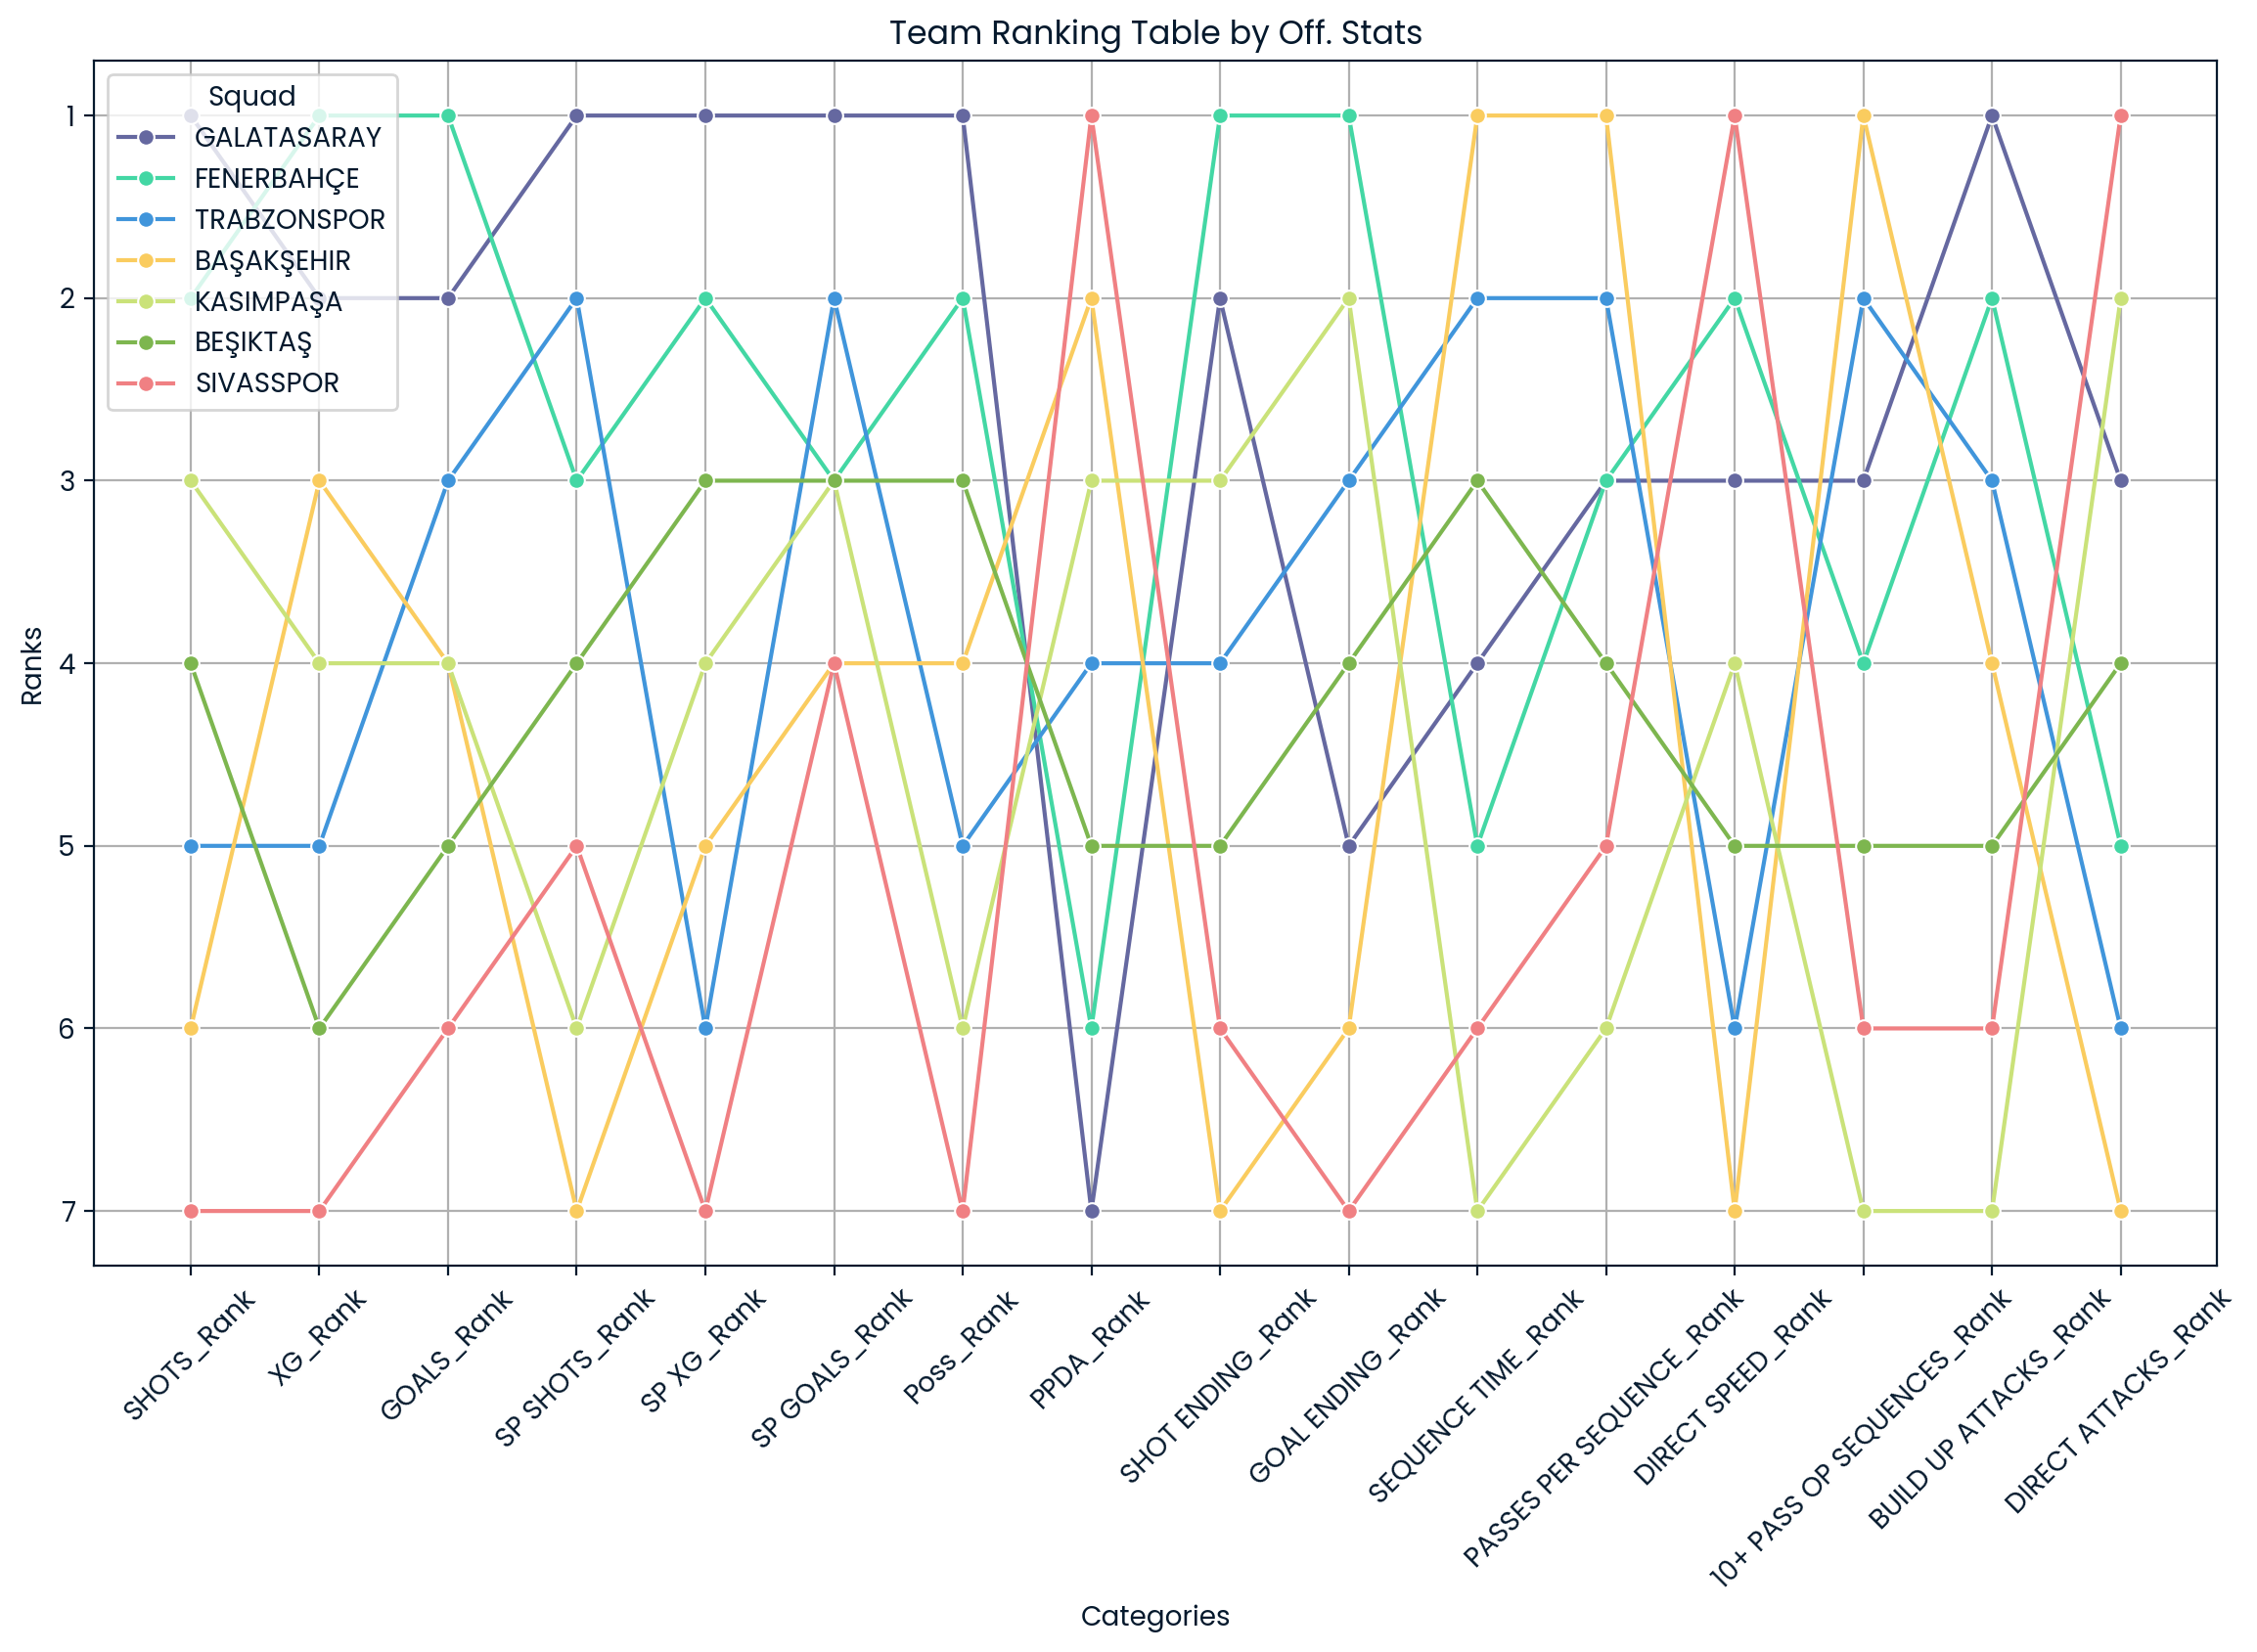

In [87]:
# Line plot for ranking by categories
melted_offensive_selected_rank = offensive_selected_rank.melt(id_vars=["TEAM"], var_name="Categories", value_name="Rank")

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_offensive_selected_rank, x="Categories", y="Rank", hue="TEAM", marker="o")

plt.title("Team Ranking Table by Off. Stats")
plt.xlabel("Categories")
plt.ylabel("Ranks")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.legend(title="Squad")
plt.grid(True)

plt.show()

In [88]:
offensive_selected_rank

,TEAM,SHOTS_Rank,XG_Rank,GOALS_Rank,SP SHOTS_Rank,SP XG_Rank,SP GOALS_Rank,Poss_Rank,PPDA_Rank,SHOT ENDING_Rank,GOAL ENDING_Rank,SEQUENCE TIME_Rank,PASSES PER SEQUENCE_Rank,DIRECT SPEED_Rank,10+ PASS OP SEQUENCES_Rank,BUILD UP ATTACKS_Rank,DIRECT ATTACKS_Rank
0,GALATASARAY,1.0,2.0,2.0,1.0,1.0,1.0,1.0,7.0,2.0,5.0,4.0,3.0,3.0,3.0,1.0,3.0
1,FENERBAHÇE,2.0,1.0,1.0,3.0,2.0,3.0,2.0,6.0,1.0,1.0,5.0,3.0,2.0,4.0,2.0,5.0
2,TRABZONSPOR,5.0,5.0,3.0,2.0,6.0,2.0,5.0,4.0,4.0,3.0,2.0,2.0,6.0,2.0,3.0,6.0
3,BAŞAKŞEHIR,6.0,3.0,4.0,7.0,5.0,4.0,4.0,2.0,7.0,6.0,1.0,1.0,7.0,1.0,4.0,7.0
4,KASIMPAŞA,3.0,4.0,4.0,6.0,4.0,3.0,6.0,3.0,3.0,2.0,7.0,6.0,4.0,7.0,7.0,2.0
5,BEŞIKTAŞ,4.0,6.0,5.0,4.0,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,5.0,5.0,5.0,4.0
6,SIVASSPOR,7.0,7.0,6.0,5.0,7.0,4.0,7.0,1.0,6.0,7.0,6.0,5.0,1.0,6.0,6.0,1.0


In [89]:
# Calculate the average offensive ranking for each team
rank_columns_avg_7_off = offensive_selected_rank.columns[1:]
offensive_selected_rank["Avg_Rank"] = offensive_selected_rank[rank_columns_avg_7_off].mean(axis=1)
sorted_offensive_selected_rank = offensive_selected_rank[["TEAM", "Avg_Rank"]].sort_values(by="Avg_Rank")
sorted_offensive_selected_rank.rename(columns={"TEAM": "Squad"}, inplace=True)
print(sorted_offensive_selected_rank)

         Squad  Avg_Rank
0  GALATASARAY    2.5000
1   FENERBAHÇE    2.6875
2  TRABZONSPOR    3.7500
5     BEŞIKTAŞ    4.2500
3   BAŞAKŞEHIR    4.3125
4    KASIMPAŞA    4.4375
6    SIVASSPOR    5.1250


In [90]:
# All teams avg
rank_columns_avg_all = offensive_selected_columns_corr[["TEAM", "SHOTS", "XG", "GOALS", "SP SHOTS", "SP XG", "SP GOALS", "Poss", "PPDA", "SHOT ENDING", "GOAL ENDING", "SEQUENCE TIME", "PASSES PER SEQUENCE", "DIRECT SPEED", "10+ PASS OP SEQUENCES", "BUILD UP ATTACKS", "DIRECT ATTACKS"]]

for statistic in rank_columns_avg_all.columns[1:]:
    rank_columns_avg_all[f'{statistic}_Rank'] = rank_columns_avg_all[statistic].rank(method='dense', ascending=False)

offensive_rank_first_column_avg = rank_columns_avg_all.columns[0]
offensive_rank_last_column_avg = rank_columns_avg_all.columns[-16:]
rank_columns_avg_all_columns = [offensive_rank_first_column_avg] + list(offensive_rank_last_column_avg)

rank_columns_avg_all = rank_columns_avg_all[rank_columns_avg_all_columns]
rank_columns_avg_all.rename(columns={"TEAM": "Squad"}, inplace=True)
rank_columns_avg_all

,Squad,SHOTS_Rank,XG_Rank,GOALS_Rank,SP SHOTS_Rank,SP XG_Rank,SP GOALS_Rank,Poss_Rank,PPDA_Rank,SHOT ENDING_Rank,GOAL ENDING_Rank,SEQUENCE TIME_Rank,PASSES PER SEQUENCE_Rank,DIRECT SPEED_Rank,10+ PASS OP SEQUENCES_Rank,BUILD UP ATTACKS_Rank,DIRECT ATTACKS_Rank
0,GALATASARAY,1.0,2.0,2.0,1.0,1.0,2.0,1.0,17.0,2.0,7.0,6.0,5.0,4.0,5.0,1.0,3.0
1,FENERBAHÇE,2.0,1.0,1.0,5.0,2.0,4.0,2.0,16.0,1.0,1.0,9.0,5.0,3.0,6.0,2.0,6.0
2,TRABZONSPOR,6.0,8.0,3.0,4.0,13.0,3.0,5.0,14.0,9.0,5.0,3.0,3.0,13.0,4.0,3.0,15.0
3,ISTANBUL BASAKSEHIR,14.0,3.0,4.0,14.0,9.0,7.0,4.0,8.0,18.0,9.0,1.0,2.0,15.0,2.0,7.0,16.0
4,KASIMPASA,3.0,7.0,4.0,11.0,7.0,4.0,13.0,10.0,4.0,2.0,19.0,17.0,5.0,20.0,19.0,2.0
5,BESIKTAS,5.0,9.0,7.0,9.0,6.0,4.0,3.0,15.0,11.0,6.0,5.0,6.0,8.0,7.0,9.0,5.0
6,SIVASSPOR,18.0,18.0,9.0,10.0,16.0,7.0,17.0,1.0,17.0,10.0,13.0,15.0,2.0,15.0,17.0,1.0
7,ALANYASPOR,11.0,4.0,5.0,16.0,11.0,9.0,6.0,6.0,12.0,6.0,2.0,1.0,14.0,1.0,4.0,8.0
8,CAYKUR RIZESPOR,7.0,5.0,8.0,9.0,4.0,4.0,12.0,7.0,14.0,6.0,15.0,16.0,4.0,17.0,16.0,10.0
9,ANTALYASPOR,10.0,19.0,9.0,2.0,5.0,9.0,9.0,11.0,8.0,8.0,11.0,7.0,6.0,8.0,6.0,16.0


In [91]:
off_avg_columns = ["SHOTS_Rank", "XG_Rank", "GOALS_Rank", "SP SHOTS_Rank", "SP XG_Rank", "SP GOALS_Rank", "Poss_Rank", "PPDA_Rank", "SHOT ENDING_Rank", "GOAL ENDING_Rank", "SEQUENCE TIME_Rank", "PASSES PER SEQUENCE_Rank", "DIRECT SPEED_Rank", "10+ PASS OP SEQUENCES_Rank", "BUILD UP ATTACKS_Rank", "DIRECT ATTACKS_Rank"]
rank_columns_avg_all["Avg_Rank"] = rank_columns_avg_all[off_avg_columns].mean(axis=1)
sorted_rank_columns_avg_all = rank_columns_avg_all[["Squad", "Avg_Rank"]].sort_values(by="Avg_Rank")
print(sorted_rank_columns_avg_all)

                  Squad  Avg_Rank
0           GALATASARAY    3.7500
1            FENERBAHÇE    4.1250
2           TRABZONSPOR    6.9375
5              BESIKTAS    7.1875
7            ALANYASPOR    7.2500
3   ISTANBUL BASAKSEHIR    8.3125
11      ADANA DEMIRSPOR    8.5625
16           ANKARAGÜCÜ    9.0000
9           ANTALYASPOR    9.0000
13          KAYSERISPOR    9.1875
4             KASIMPASA    9.1875
8       CAYKUR RIZESPOR    9.6250
17     FATIH KARAGÜMRÜK    9.8125
18           PENDIKSPOR   10.8750
14            HATAYSPOR   11.0000
10         GAZIANTEP FK   11.1875
6             SIVASSPOR   11.6250
15            KONYASPOR   12.0000
12           SAMSUNSPOR   12.2500
19         ISTANBULSPOR   12.3750


In [92]:
# To see did teams finished +/- 4
sorted_rank_columns_avg_all["ranking"] = sorted_rank_columns_avg_all["Avg_Rank"].rank(method="dense", ascending=True)
sorted_rank_columns_avg_all.sort_values("ranking", ascending=True)
avg_all_merged_standing = sorted_rank_columns_avg_all.merge(süper_lig, on="Squad")
avg_all_merged_standing = avg_all_merged_standing[["Squad", "ranking", "Rk"]]

avg_all_merged_standing["Rank_Diff"] = (avg_all_merged_standing["ranking"] - avg_all_merged_standing["Rk"]).abs()
avg_all_merged_standing["Within_Range3"] = avg_all_merged_standing["Rank_Diff"] <= 3
avg_all_merged_standing["Within_Range"] = avg_all_merged_standing["Rank_Diff"] <= 4
avg_all_merged_standing["Within_Range5"] = avg_all_merged_standing["Rank_Diff"] <= 5

print(avg_all_merged_standing["Within_Range3"].value_counts(normalize=True))
print(avg_all_merged_standing["Within_Range"].value_counts(normalize=True))
print(avg_all_merged_standing["Within_Range5"].value_counts(normalize=True))
avg_all_merged_standing

Within_Range3
True     0.6
False    0.4
Name: proportion, dtype: float64
Within_Range
True     0.7
False    0.3
Name: proportion, dtype: float64
Within_Range5
True     0.8
False    0.2
Name: proportion, dtype: float64


,Squad,ranking,Rk,Rank_Diff,Within_Range3,Within_Range,Within_Range5
0,GALATASARAY,1.0,1,0.0,True,True,True
1,FENERBAHÇE,2.0,2,0.0,True,True,True
2,TRABZONSPOR,3.0,3,0.0,True,True,True
3,BESIKTAS,4.0,6,2.0,True,True,True
4,ALANYASPOR,5.0,8,3.0,True,True,True
5,ISTANBUL BASAKSEHIR,6.0,4,2.0,True,True,True
6,ADANA DEMIRSPOR,7.0,12,5.0,False,False,True
7,ANKARAGÜCÜ,8.0,17,9.0,False,False,False
8,ANTALYASPOR,8.0,10,2.0,True,True,True
9,KAYSERISPOR,9.0,14,5.0,False,False,True


          Avg_Rank       Pts         W         D         L        GF        GA
Avg_Rank  1.000000 -0.865598 -0.844934  0.407593  0.829539 -0.880712  0.738088
Pts      -0.865598  1.000000  0.989302 -0.546514 -0.923752  0.962437 -0.842592
W        -0.844934  0.989302  1.000000 -0.662834 -0.858000  0.955892 -0.796619
D         0.407593 -0.546514 -0.662834  1.000000  0.184109 -0.547518  0.248317
L         0.829539 -0.923752 -0.858000  0.184109  1.000000 -0.879206  0.875379
GF       -0.880712  0.962437  0.955892 -0.547518 -0.879206  1.000000 -0.762511
GA        0.738088 -0.842592 -0.796619  0.248317  0.875379 -0.762511  1.000000


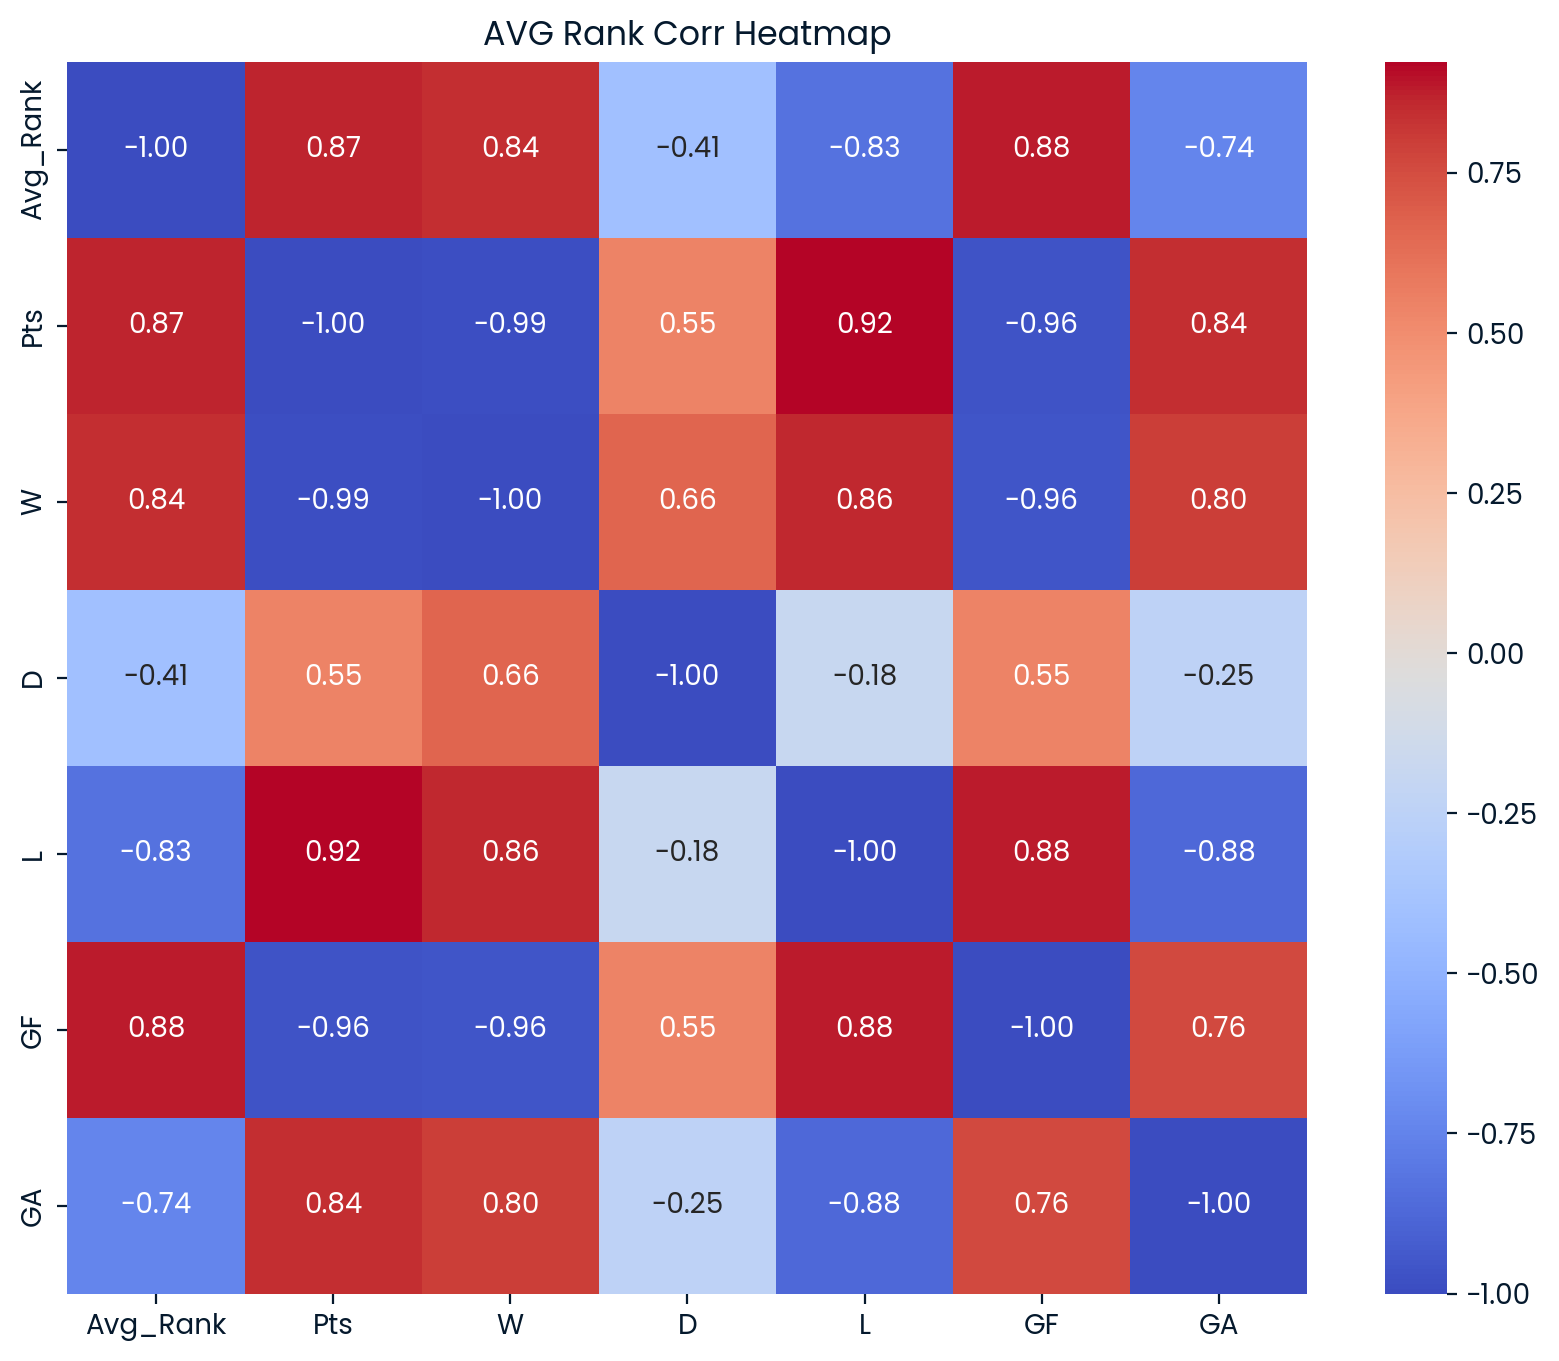

In [93]:
# Offensive ranking heatmap
avg_offensive_rank_heatmap = sorted_rank_columns_avg_all.merge(süper_lig, on="Squad")
avg_offensive_rank_heatmap = avg_offensive_rank_heatmap[["Avg_Rank", "Pts", "W", "D", "L", "GF", "GA"]]
avg_offensive_rank_heatmap_corr = avg_offensive_rank_heatmap.corr()
print(avg_offensive_rank_heatmap_corr)
# Need to invert it to be more clear
avg_offensive_rank_heatmap_corr = -avg_offensive_rank_heatmap_corr

plt.figure(figsize=(10, 8))
sns.heatmap(avg_offensive_rank_heatmap_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("AVG Rank Corr Heatmap")
plt.show()